# ATLAS Calorimeter Layer Information
## Layer Details

### **EM Calorimeter (subCalo = 0)**

| Layer | Name | η Range | φ Range | Region |
|-------|------|---------|---------|---------|
| **0** | EM Barrel Presampler | (-1.51, 1.52) | (-3.09, 3.10) | BARREL |
| **1** | EM Barrel Layer 1 | (-1.46, 1.47) | (-3.13, 3.13) | BARREL |
| **2** | EM Barrel Layer 2 | (-1.44, 1.44) | (-3.13, 3.13) | BARREL |
| **3** | EM Barrel Layer 3 | (-1.33, 1.33) | (-3.13, 3.13) | BARREL |
| **4** | EM Endcap Layer 1 | (-1.80, 1.80) | (-3.10, 3.10) | ENDCAP |
| **5** | EM Endcap Layer 2 | (-2.50, 2.50) | (-3.10, 3.10) | ENDCAP |
| **6** | EM Endcap Layer 3 | (-3.16, 3.16) | (-3.13, 3.13) | ENDCAP |
| **7** | EM Endcap Back | (-3.16, 3.16) | (-3.13, 3.13) | ENDCAP |

---

### **Tile Calorimeter (subCalo = 1) - Extended/Forward Only**

| Layer | Name | η Range | φ Range | Region |
|-------|------|---------|---------|---------|
| **8** | Tile Forward Layer A | (-3.21, 3.21) | (-3.09, 3.09) | FORWARD |
| **9** | Tile Forward Layer BC | (-3.01, 3.01) | (-3.09, 3.09) | FORWARD |
| **10** | Tile Extended Barrel A | (-3.00, 3.00) | (-3.09, 3.09) | FORWARD |
| **11** | Tile Extended Barrel BC | (-3.20, 3.20) | (-3.09, 3.09) | FORWARD |

---

### **HEC - Hadronic Endcap Calorimeter (subCalo = 2)**

| Layer | Name | η Range | φ Range | Region |
|-------|------|---------|---------|---------|
| **21** | HEC Layer 0 | (-4.82, 4.82) | (-3.13, 3.13) | FORWARD |
| **22** | HEC Layer 1 | (-4.81, 4.81) | (-3.12, 3.12) | FORWARD |
| **23** | HEC Layer 2 | (-4.75, 4.75) | (-3.09, 3.09) | FORWARD |

---

### **Inner Barrel Calorimeter (subCalo = 3)**

*Previously mislabeled as FCAL - This is likely the Inner Tile Barrel or another barrel calorimeter*

| Layer | Name | η Range | φ Range | Region |
|-------|------|---------|---------|---------|
| **12** | Inner Barrel Module 0 | (-0.94, 0.94) | (-3.09, 3.09) | BARREL |
| **13** | Inner Barrel Module 1 | (-0.84, 0.84) | (-3.09, 3.09) | BARREL |
| **14** | Inner Barrel Module 2 | (-0.61, 0.61) | (-3.09, 3.09) | BARREL |
| **15** | Inner Barrel Presampler | (-0.94, 0.95) | (-3.09, 3.09) | BARREL |
| **16** | Inner Barrel Special 1 | (-0.86, 0.86) | (-3.09, 3.09) | BARREL |
| **17** | Inner Barrel Special 2 | (-1.66, 1.66) | (-3.09, 3.09) | ENDCAP |
| **18** | Inner Barrel Special 3 | (-1.58, 1.58) | (-3.09, 3.09) | ENDCAP |
| **19** | Inner Barrel Special 4 | (-1.45, 1.45) | (-3.09, 3.09) | BARREL |
| **20** | Inner Barrel Special 5 | (-1.23, 1.23) | (-3.09, 3.09) | BARREL |

---


## Region Definitions
- **BARREL**: Central region of the detector
- **ENDCAP**: Intermediate region between barrel and forward
- **FORWARD**: Forward region with large pseudorapidity coverage

## Notes
1. All φ ranges are given in radians
2. η ranges represent pseudorapidity coverage

(2, 6400)


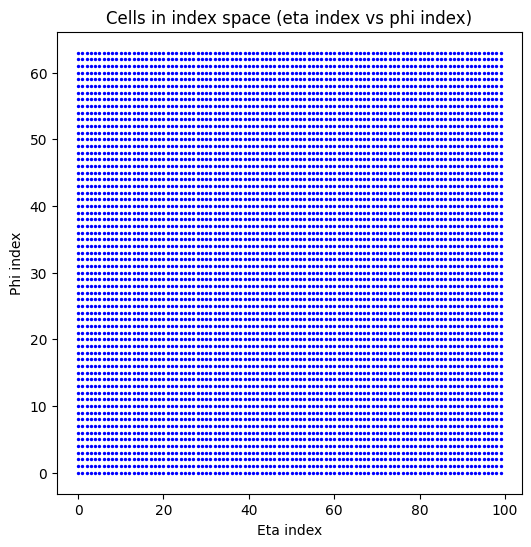

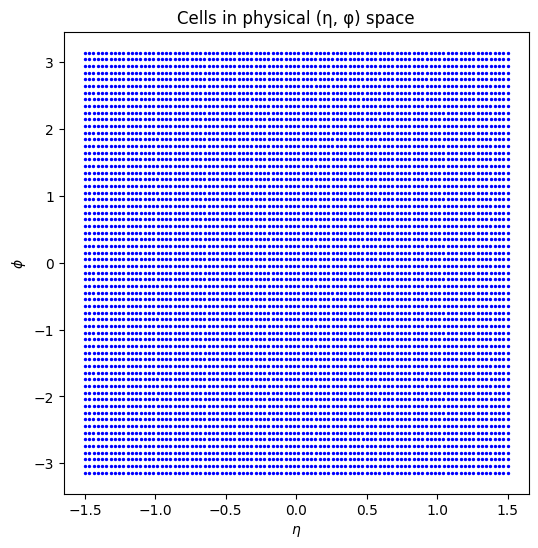

Eta index 0:
-1.4999867972290077 -1.4990129836252528
Phi range:
-3.1399993857415756 3.1409994101473533


In [32]:
import numpy as np
import random
import matplotlib.pyplot as plt
n_eta = 100
n_phi = 64
eta_values = np.linspace(-1.5,1.5, n_eta)
phi_values = np.linspace(-3.14,3.14, n_phi)
eta_offset = np.random.random((n_phi, n_eta))/1000
phi_offset = np.random.random((n_phi, n_eta))/1000
cells_eta = np.tile(eta_values, (n_phi,1))+eta_offset
cells_phi = np.tile(phi_values, (n_eta,1)).transpose()+phi_offset
all_cells = np.stack((cells_eta, cells_phi)).reshape(2,64*100)
print(all_cells.shape)

plt.figure(figsize=(6, 6))

for eta_idx in range(n_eta):
    phi_indices = np.arange(n_phi)
    eta_indices = np.full(n_phi, eta_idx)
    plt.scatter(eta_indices, phi_indices, s=2, c="blue")

plt.xlabel("Eta index")
plt.ylabel("Phi index")
plt.title("Cells in index space (eta index vs phi index)")
plt.show()

plt.figure(figsize=(6, 6))

for eta_idx in range(n_eta):
    plt.scatter(
        cells_eta[:, eta_idx],
        cells_phi[:, eta_idx],
        s=2,
        c="blue"
    )

plt.xlabel(r"$\eta$")
plt.ylabel(r"$\phi$")
plt.title("Cells in physical (η, φ) space")
plt.show()

print("Eta index 0:")
print(cells_eta[:, 0].min(), cells_eta[:, 0].max())

print("Phi range:")
print(cells_phi.min(), cells_phi.max())

In [33]:
# -----------------------
# Imports
# -----------------------
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Helper function to build bin edges from cell centers
def edges_from_centers(centers):
    centers = np.asarray(centers)
    edges = np.zeros(len(centers) + 1)
    edges[1:-1] = 0.5 * (centers[1:] + centers[:-1])
    edges[0] = centers[0] - (centers[1] - centers[0]) / 2
    edges[-1] = centers[-1] + (centers[-1] - centers[-2]) / 2
    return edges

# -----------------------
# Load HDF5 event file
# -----------------------
H5_DEFAULT = "events.h5"
event_id = 700

with h5py.File(H5_DEFAULT, "r") as f:
    # Inspect top-level keys and datasets
    print("Top-level keys:", list(f.keys()))
    if "cell" in f:
        print("Datasets in 'cell':", list(f["cell"].keys()))
    
    # Load cell data for this event
    df_cells = pd.DataFrame({
        "eta": f["cell/cell_eta"][event_id],
        "phi": f["cell/cell_phi"][event_id],
        "subCalo": f["cell/cell_subCalo"][event_id],
        "layer": f["cell/cell_sampling"][event_id],
        "energy": f["cell/cell_e"][event_id],
        "hashID": f["cell/cell_hashID"][event_id],
        "cluster_index": f["cell/cell_cluster_index"][event_id],
    })

# Remove cells with missing coordinates
df_cells = df_cells[np.isfinite(df_cells[["eta", "phi"]]).all(axis=1)]

df_cells.head()

Top-level keys: ['backup_all_branches', 'cell', 'clusters_structured', 'jagged', 'labels_h5', 'meta', 'pairs']
Datasets in 'cell': ['cell_SNR_raw', 'cell_SNR_scaled', 'cell_cluster_index', 'cell_e', 'cell_eta', 'cell_hashID', 'cell_phi', 'cell_sampling', 'cell_subCalo', 'cell_time', 'cell_to_cluster_e', 'cell_to_cluster_eta', 'cell_to_cluster_phi', 'cell_truth', 'cell_weight', 'cell_x', 'cell_y', 'cell_z']


,eta,phi,subCalo,layer,energy,hashID,cluster_index
0,-2.559710,0.053900,0.0,6.0,-327.021637,0.0,141
1,-2.559648,0.151909,0.0,6.0,-398.244751,1.0,0
2,-2.559603,0.249912,0.0,6.0,-1301.805908,2.0,0
3,-2.559574,0.347912,0.0,6.0,-3151.033203,3.0,0
4,-2.559562,0.445909,0.0,6.0,-2688.553223,4.0,0


Number of Layer 0 cells: 7808


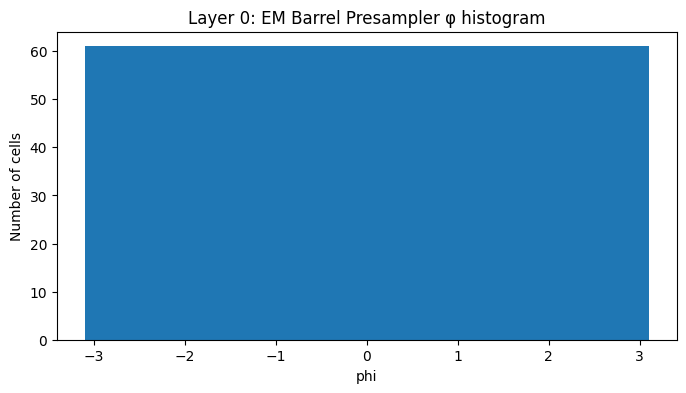

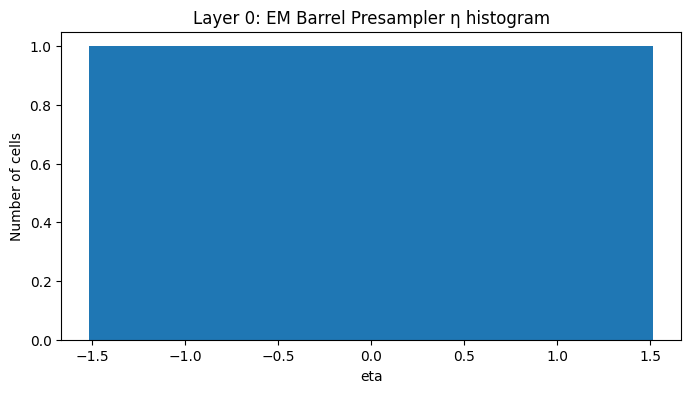

Number of eta bins: 123
Number of phi bins: 63


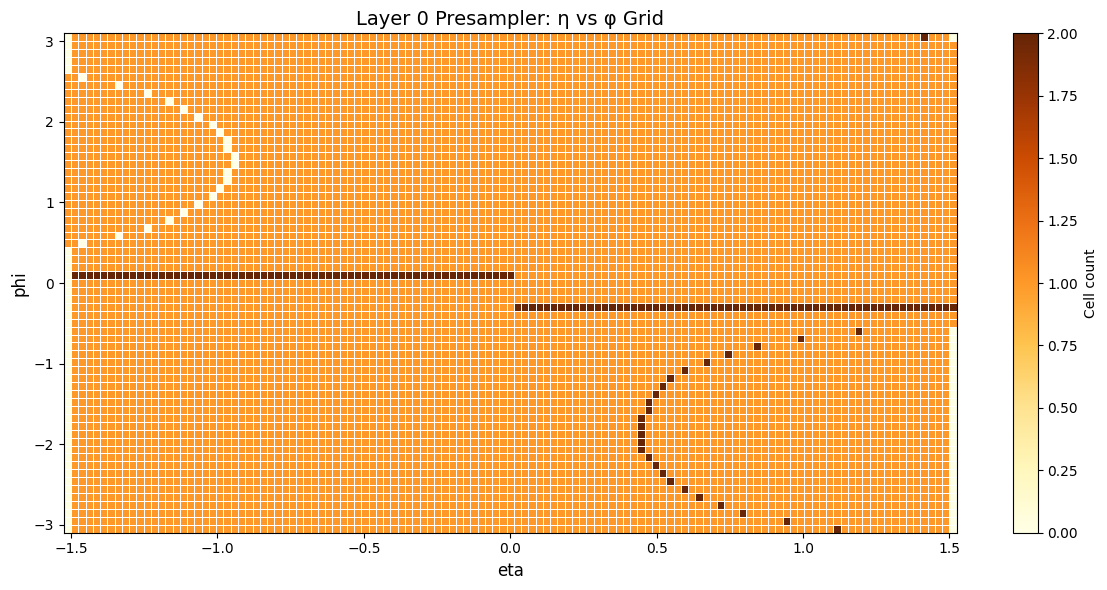

In [34]:
# -----------------------
# Layer 0 selection
# -----------------------
select = df_cells['layer'] == 0
df_layer0 = df_cells[select]
print("Number of Layer 0 cells:", len(df_layer0))
df_layer0.head()

# -----------------------
# Phi histogram
# -----------------------
phi_values = np.sort(df_layer0['phi'].unique())

# Compute bin edges (halfway between cells)
phi_edges = np.zeros(len(phi_values) + 1)
phi_edges[1:-1] = (phi_values[1:] + phi_values[:-1]) / 2
phi_edges[0] = phi_values[0] - (phi_values[1] - phi_values[0]) / 2
phi_edges[-1] = phi_values[-1] + (phi_values[-1] - phi_values[-2]) / 2

plt.figure(figsize=(8,4))
plt.hist(df_layer0['phi'], bins=phi_edges)
plt.xlabel("phi")
plt.ylabel("Number of cells")
plt.title("Layer 0: EM Barrel Presampler φ histogram")
plt.show()

# -----------------------
# Eta histogram
# -----------------------
eta_values = np.sort(df_layer0['eta'].unique())

# Compute bin edges
eta_edges = np.zeros(len(eta_values) + 1)
eta_edges[1:-1] = (eta_values[1:] + eta_values[:-1]) / 2
eta_edges[0] = eta_values[0] - (eta_values[1] - eta_values[0]) / 2
eta_edges[-1] = eta_values[-1] + (eta_values[-1] - eta_values[-2]) / 2

plt.figure(figsize=(8,4))
plt.hist(df_layer0['eta'], bins=eta_edges)
plt.xlabel("eta")
plt.ylabel("Number of cells")
plt.title("Layer 0: EM Barrel Presampler η histogram")
plt.show()

# -----------------------
# Round eta and phi to cell width
# -----------------------
eta_rounded = np.round(df_layer0['eta'] / 0.025) * 0.025
phi_rounded = np.round(df_layer0['phi'] / 0.1) * 0.1

num_eta_bins = len(np.unique(eta_rounded))
num_phi_bins = len(np.unique(phi_rounded))
print("Number of eta bins:", num_eta_bins)
print("Number of phi bins:", num_phi_bins)

# -----------------------
# 2D histogram / grid visualization
# -----------------------
eta_values = np.sort(np.unique(eta_rounded))
phi_values = np.sort(np.unique(phi_rounded))

H, eta_edges, phi_edges = np.histogram2d(
    eta_rounded, phi_rounded,
    bins=[eta_values.size, phi_values.size]
)

# Create meshgrid for pcolormesh
X, Y = np.meshgrid(eta_edges, phi_edges)

plt.figure(figsize=(12,6))
plt.pcolormesh(
    X, Y, H.T, cmap='YlOrBr', edgecolors='white', linewidth=0.5
)
plt.colorbar(label='Cell count')
plt.xlabel('eta', fontsize=12)
plt.ylabel('phi', fontsize=12)
plt.title('Layer 0 Presampler: η vs φ Grid', fontsize=14)
plt.tight_layout()
plt.show()

Number of eta cells: 7808
Number of phi cells: 128
Total cells in data: 7808
Total histogram entries: 7808.0
Histogram min / max: 0.0 1.0
Unique histogram counts: (array([0., 1.]), array([991616,   7808]))


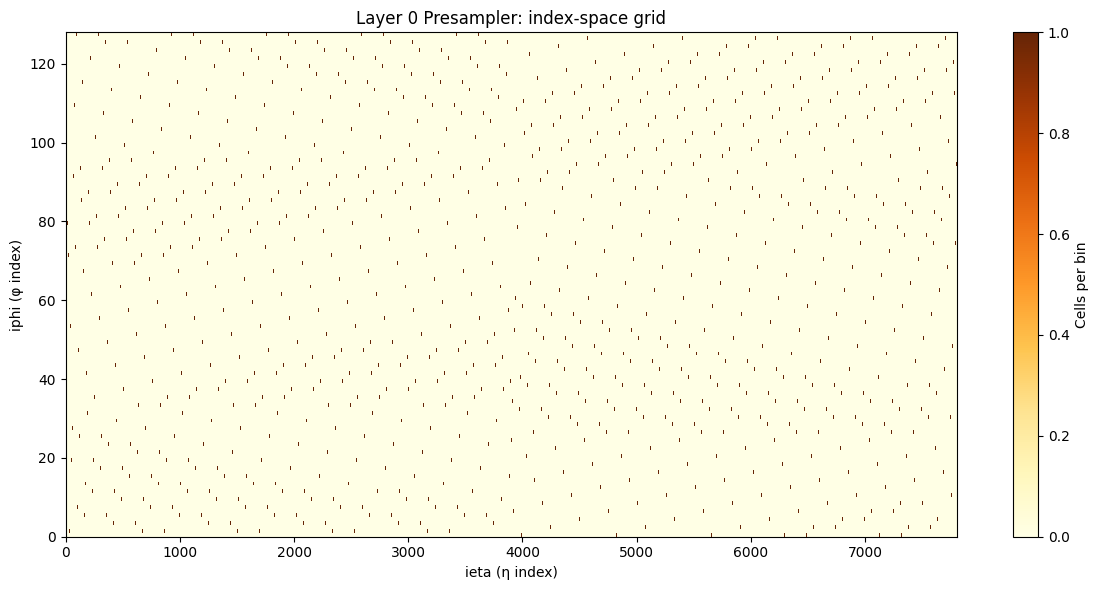

[-3.092874   -3.0877235  -2.9948125  -2.989566   -2.896776   -2.891425
 -2.7987628  -2.7932997  -2.7007713  -2.6951902  -2.6028004  -2.5970955
 -2.5048473  -2.4990146  -2.4069104  -2.4009473  -2.3089874  -2.302892
 -2.2110755  -2.2048476  -2.1131725  -2.1068132  -2.0152757  -2.008787
 -1.9173826  -1.9107678  -1.8194903  -1.812754   -1.7215962  -1.7147443
 -1.6236976  -1.6167369  -1.525792   -1.5187303  -1.4278766  -1.4207228
 -1.329949   -1.3227129  -1.2320069  -1.2246989  -1.1340481  -1.1266793
 -1.0360703  -1.0286527  -0.9380718  -0.9306176  -0.8400509  -0.8325726
 -0.74200594 -0.73451656 -0.64393586 -0.63644826 -0.5458395  -0.53836673
 -0.44771615 -0.44027108 -0.34956524 -0.3421605  -0.25138658 -0.24403436
 -0.15318014 -0.14589222 -0.05494622 -0.04773372  0.04331464  0.05044128
  0.14160162  0.14863278  0.23991367  0.24684066  0.33824947  0.34506458
  0.43660748  0.44330406  0.53498596  0.5415585   0.6333829   0.6398272
  0.7317962   0.7381092   0.83022356  0.83640337  0.9286625   0

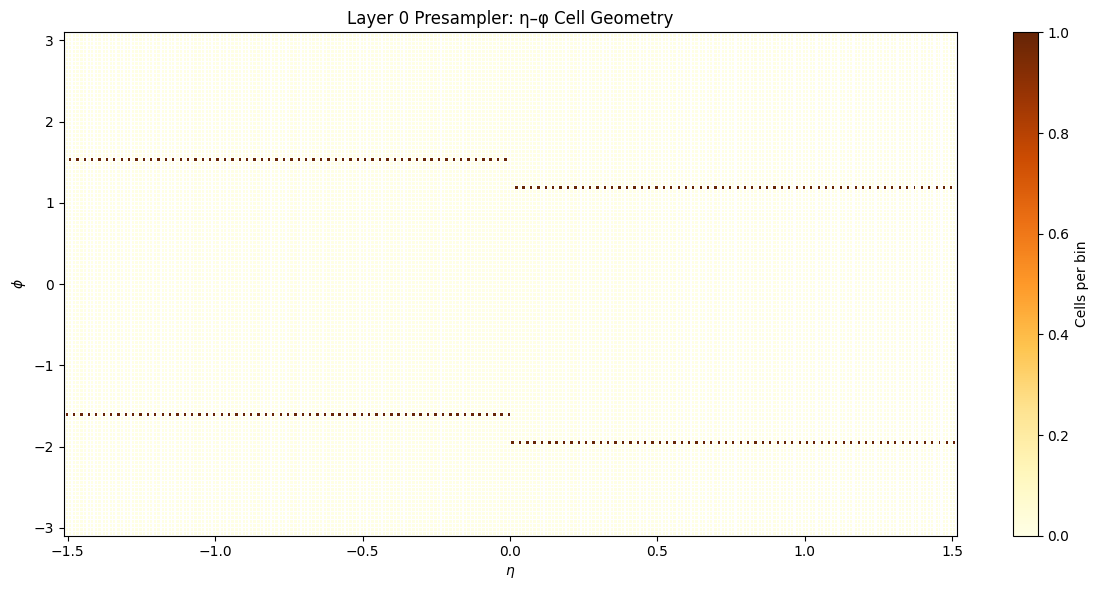

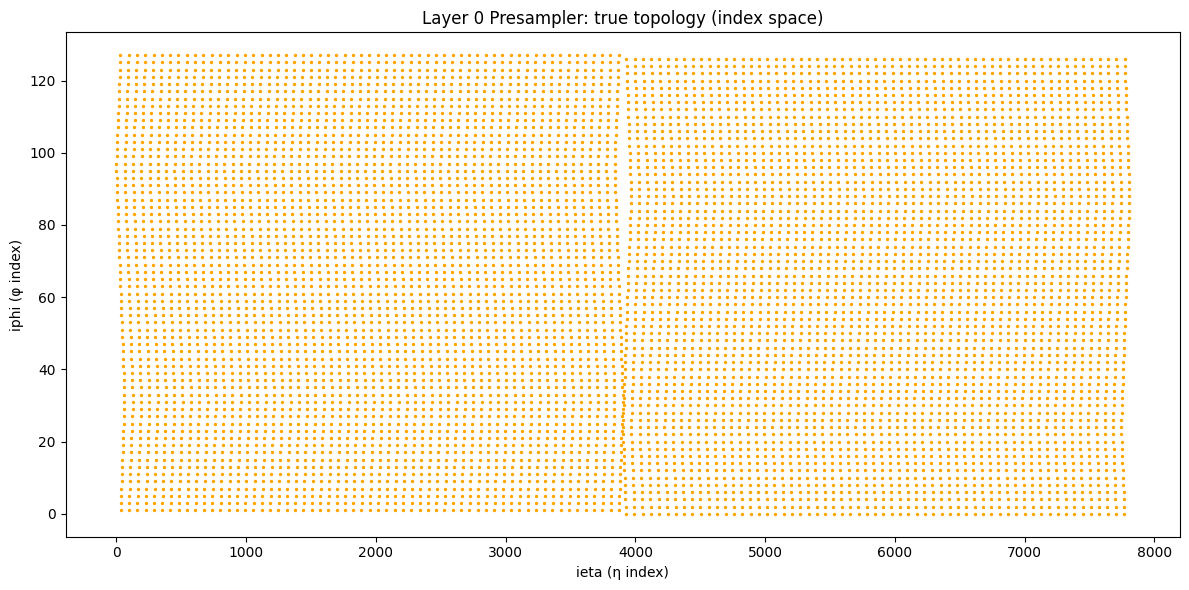

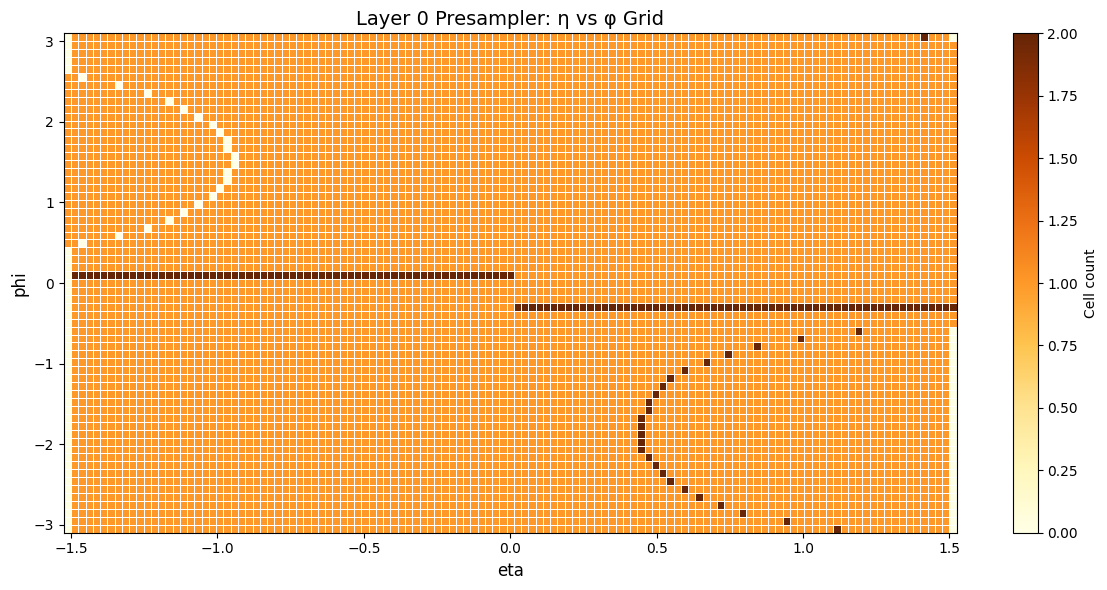

In [35]:
# =====================================================================
# Layer 0 (Presampler) Geometry Exploration
# =====================================================================

# ---------------------------------------------------------------------
# Discover the detector geometry from data
# ---------------------------------------------------------------------
# Unique eta and phi values correspond to true cell centers
eta_centers = np.sort(df_layer0["eta"].unique())
phi_centers = np.sort(df_layer0["phi"].unique())

print(f"Number of eta cells: {len(eta_centers)}")
print(f"Number of phi cells: {len(phi_centers)}")

# ---------------------------------------------------------------------
# Build index maps (topology in index space)
# ---------------------------------------------------------------------
# Map each unique eta/phi to integer indices for array-based plotting
eta_to_i = {eta: i for i, eta in enumerate(eta_centers)}
phi_to_i = {phi: i for i, phi in enumerate(phi_centers)}

df_layer0["ieta"] = df_layer0["eta"].map(eta_to_i)
df_layer0["iphi"] = df_layer0["phi"].map(phi_to_i)

# ---------------------------------------------------------------------
# Histogram in index space
# ---------------------------------------------------------------------
# 2D histogram: one bin per cell, no assumptions about cell spacing
H, _, _ = np.histogram2d(
    df_layer0["ieta"],
    df_layer0["iphi"],
    bins=[len(eta_centers), len(phi_centers)]
)

print("Total cells in data:", len(df_layer0))
print("Total histogram entries:", H.sum())
print("Histogram min / max:", H.min(), H.max())
print("Unique histogram counts:", np.unique(H, return_counts=True))

# ---------------------------------------------------------------------
# Plot in index space (debugging / verification)
# ---------------------------------------------------------------------
# Each axis represents the index of a cell, not physical coordinates
plt.figure(figsize=(12, 6))
plt.pcolormesh(
    H.T,                # transpose to align axes correctly
    cmap="YlOrBr"
)
plt.colorbar(label="Cells per bin")
plt.xlabel("ieta (η index)")
plt.ylabel("iphi (φ index)")
plt.title("Layer 0 Presampler: index-space grid")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# Map back to physical η–φ for presentation
# ---------------------------------------------------------------------

# Which unique phi values exist?
print(np.sort(df_layer0['phi'].unique()))

# Count number of cells per phi
print(df_layer0.groupby('phi').size())

# Count number of cells per eta
print(df_layer0.groupby('eta').size())

# Compute bin edges from data-derived centers
eta_edges = edges_from_centers(eta_centers)
phi_edges = edges_from_centers(phi_centers)

# Create meshgrid for pcolormesh in physical coordinates
X, Y = np.meshgrid(eta_edges, phi_edges)

plt.figure(figsize=(12,6))
plt.pcolormesh(
    X, Y,
    H.T,
    cmap="YlOrBr",
    edgecolors="white",
    linewidth=0.4
)
plt.colorbar(label="Cells per bin")
plt.xlabel(r"$\eta$")
plt.ylabel(r"$\phi$")
plt.title("Layer 0 Presampler: η–φ Cell Geometry")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# Scatter plot of true topology (index space)
# ---------------------------------------------------------------------
# Good for seeing exact positions of all cells
plt.figure(figsize=(12,6))
plt.scatter(
    df_layer0["ieta"],
    df_layer0["iphi"],
    s=2,
    color="orange"
)
plt.xlabel("ieta (η index)")
plt.ylabel("iphi (φ index)")
plt.title("Layer 0 Presampler: true topology (index space)")
plt.tight_layout()
plt.show()

# -----------------------
# Coarse rounding using the presampler geometry
# -----------------------
eta_binwidth = 0.025
phi_binwidth = 0.1

eta_plot = np.round(df_layer0['eta'] / eta_binwidth) * eta_binwidth
phi_plot = np.round(df_layer0['phi'] / phi_binwidth) * phi_binwidth

H, eta_edges, phi_edges = np.histogram2d(
    eta_plot, phi_plot,
    bins=[len(np.unique(eta_plot)), len(np.unique(phi_plot))]
)

X, Y = np.meshgrid(eta_edges, phi_edges)

plt.figure(figsize=(12,6))
plt.pcolormesh(
    X, Y, H.T, cmap='YlOrBr', edgecolors='white', linewidth=0.5
)
plt.colorbar(label='Cell count')
plt.xlabel('eta', fontsize=12)
plt.ylabel('phi', fontsize=12)
plt.title('Layer 0 Presampler: η vs φ Grid', fontsize=14)
plt.tight_layout()
plt.show()

Total possible (ieta,iphi) pairs: 999424
Actual cells in data: 7808
Non-existent cells implied by Cartesian assumption: 991616
Fraction of fake cells: 0.9921875


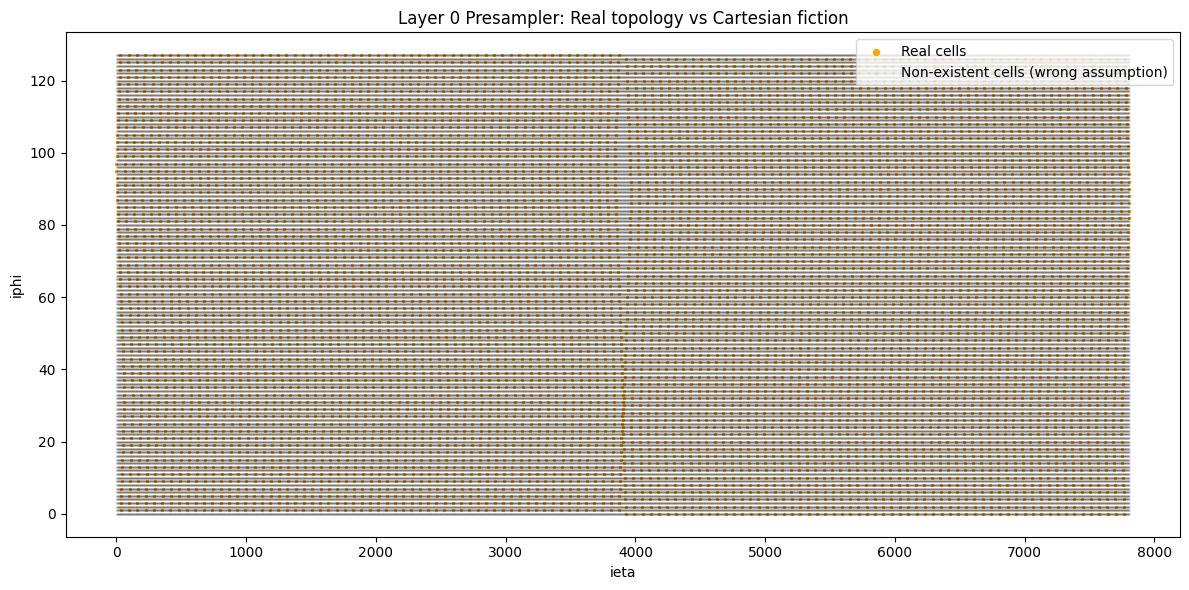

Min φ per η: 1
Max φ per η: 1


In [36]:
# Number of indices
N_eta = len(eta_centers)
N_phi = len(phi_centers)

# Full Cartesian grid of indices
ieta_grid, iphi_grid = np.meshgrid(
    np.arange(N_eta),
    np.arange(N_phi),
    indexing="ij"
)

full_grid = set(zip(ieta_grid.ravel(), iphi_grid.ravel()))
print("Total possible (ieta,iphi) pairs:", len(full_grid))

# Actual cells from data
real_cells = set(zip(df_layer0["ieta"], df_layer0["iphi"]))
print("Actual cells in data:", len(real_cells))

# Cells that would exist IF the wrong assumption were true
fake_cells = full_grid - real_cells

print("Non-existent cells implied by Cartesian assumption:", len(fake_cells))
print("Fraction of fake cells:",
      len(fake_cells) / len(full_grid))

# Convert fake cells to arrays for plotting
fake_ieta, fake_iphi = zip(*fake_cells)

plt.figure(figsize=(12,6))

# Real cells (what actually exists)
plt.scatter(
    df_layer0["ieta"],
    df_layer0["iphi"],
    s=2,
    label="Real cells",
    color="orange"
)

# Fake cells (what the wrong assumption invents)
plt.scatter(
    fake_ieta,
    fake_iphi,
    s=1,
    label="Non-existent cells (wrong assumption)",
    color="black",
    alpha=0.02
)

plt.xlabel("ieta")
plt.ylabel("iphi")
plt.title("Layer 0 Presampler: Real topology vs Cartesian fiction")
plt.legend(markerscale=3)
plt.tight_layout()
plt.show()

phi_counts_per_eta = df_layer0.groupby("ieta")["iphi"].nunique()

print("Min φ per η:", phi_counts_per_eta.min())
print("Max φ per η:", phi_counts_per_eta.max())

all_cells shape: (2, 999424)


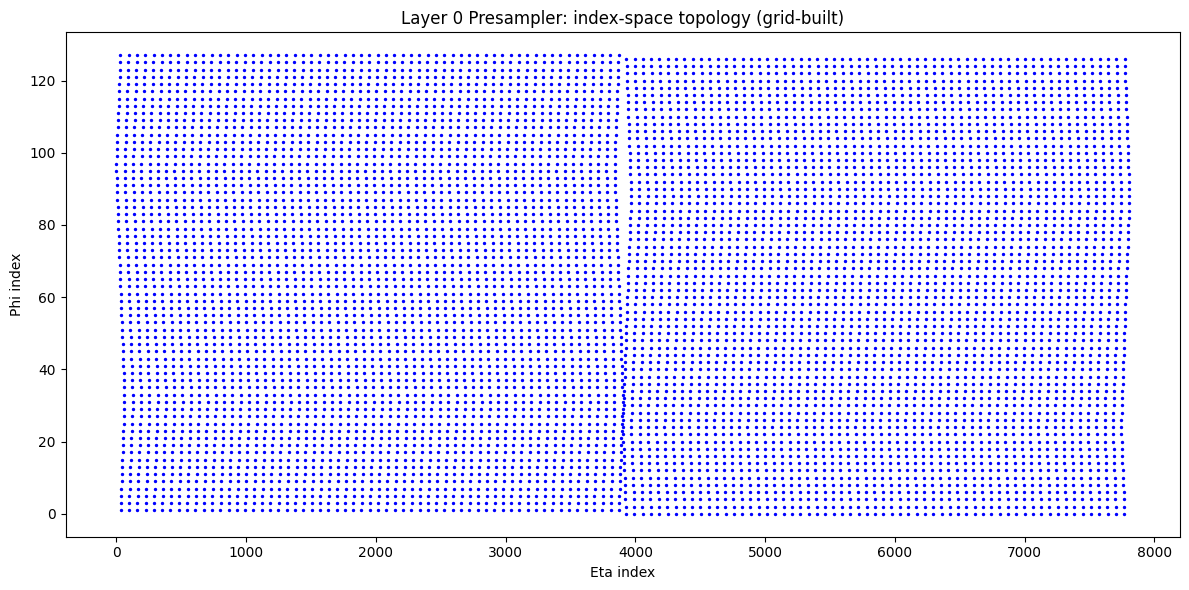

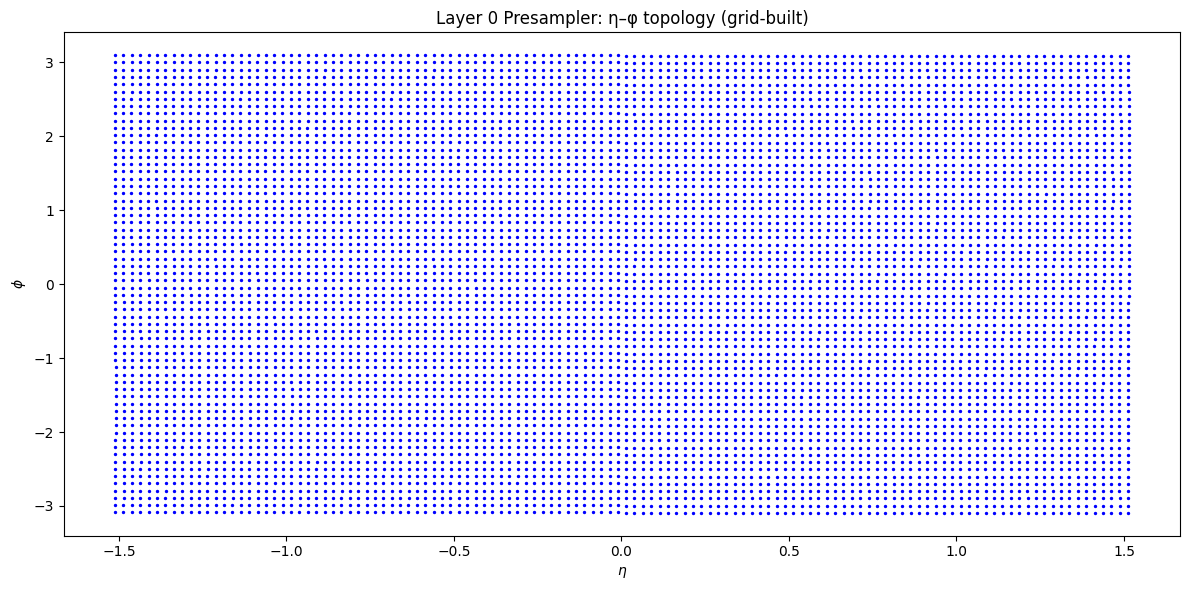

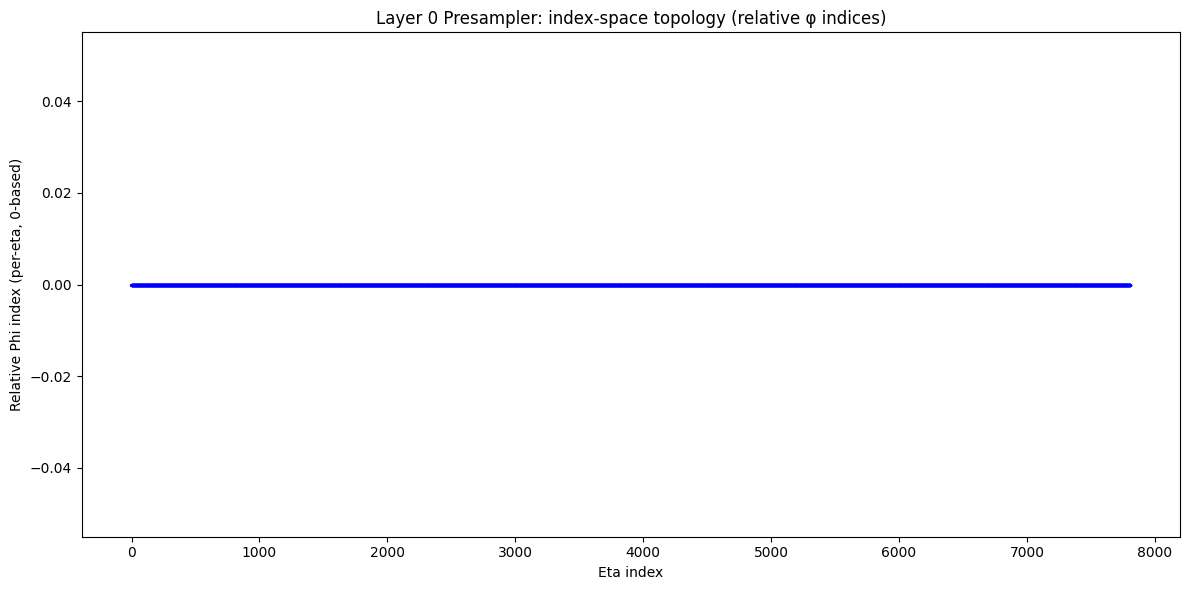

'\nCode is rounding, so the binning results in skipping of certain phi and eta and such \nTake everything on eta to left and decrease phi index by 1 (problems in middle - fix this as well)\nOnly evens and odds, so renumber them accordingly to fix things\nShift eta by one to right for the overlapping region - by maybe\n'

In [37]:
# ---------------------------------------------------------------------
# Discover geometry from data
# ---------------------------------------------------------------------
eta_centers = np.sort(df_layer0["eta"].unique())
phi_centers = np.sort(df_layer0["phi"].unique())

n_eta = len(eta_centers)
n_phi = len(phi_centers)

eta_to_i = {eta: i for i, eta in enumerate(eta_centers)}
phi_to_i = {phi: i for i, phi in enumerate(phi_centers)}

# ---------------------------------------------------------------------
# Build grid containers (phi index first, eta index second)
# ---------------------------------------------------------------------
cells_eta = np.full((n_phi, n_eta), np.nan)
cells_phi = np.full((n_phi, n_eta), np.nan)

# ---------------------------------------------------------------------
# FILL THE GRID FROM THE DATA  ← this was missing
# ---------------------------------------------------------------------
for _, row in df_layer0.iterrows():
    ieta = eta_to_i[row["eta"]]
    iphi = phi_to_i[row["phi"]]

    cells_eta[iphi, ieta] = row["eta"]
    cells_phi[iphi, ieta] = row["phi"]

# ---------------------------------------------------------------------
# Optional: stack like the toy example
# ---------------------------------------------------------------------
all_cells = np.stack(
    (cells_eta, cells_phi),
    axis=0
).reshape(2, n_phi * n_eta)

print("all_cells shape:", all_cells.shape)

# ---------------------------------------------------------------------
# Plot in INDEX SPACE (same logic as toy example)
# ---------------------------------------------------------------------
figsize = (12,6)

plt.figure(figsize=figsize)

for ieta in range(n_eta):
    iphi_indices = np.arange(n_phi)
    mask = ~np.isnan(cells_eta[:, ieta])

    plt.scatter(
        np.full(np.sum(mask), ieta),
        iphi_indices[mask],
        s=2,
        c="b"
    )

plt.xlabel("Eta index")
plt.ylabel("Phi index")
plt.title("Layer 0 Presampler: index-space topology (grid-built)")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# Plot in PHYSICAL η–φ SPACE (same slicing, real coordinates)
# ---------------------------------------------------------------------
plt.figure(figsize=figsize)

for ieta in range(n_eta):
    mask = ~np.isnan(cells_eta[:, ieta])

    plt.scatter(
        cells_eta[mask, ieta],
        cells_phi[mask, ieta],
        s=2,
        c="b"
    )

plt.xlabel(r"$\eta$")
plt.ylabel(r"$\phi$")
plt.title("Layer 0 Presampler: η–φ topology (grid-built)")
plt.tight_layout()
plt.show()

# If you want to maintain gaps but reindex starting from 0
plt.figure(figsize=figsize)

for ieta in range(n_eta):
    # valid cells in this eta column
    mask = ~np.isnan(cells_phi[:, ieta])
    
    if not np.any(mask):
        continue
    
    # Get the actual phi indices for valid cells
    phi_indices = np.where(mask)[0]
    
    # Reindex starting from 0 but maintain relative spacing
    min_phi = np.min(phi_indices)
    reindexed_phi = phi_indices - min_phi
    
    plt.scatter(
        np.full(len(phi_indices), ieta - 1),  # Shift eta left by 1
        reindexed_phi,
        s=2,
        c="b"
    )

plt.xlabel("Eta index")
plt.ylabel("Relative Phi index (per-eta, 0-based)")
plt.title("Layer 0 Presampler: index-space topology (relative φ indices)")
plt.tight_layout()
plt.show()


'''
Code is rounding, so the binning results in skipping of certain phi and eta and such 
Take everything on eta to left and decrease phi index by 1 (problems in middle - fix this as well)
Only evens and odds, so renumber them accordingly to fix things
Shift eta by one to right for the overlapping region - by maybe
'''

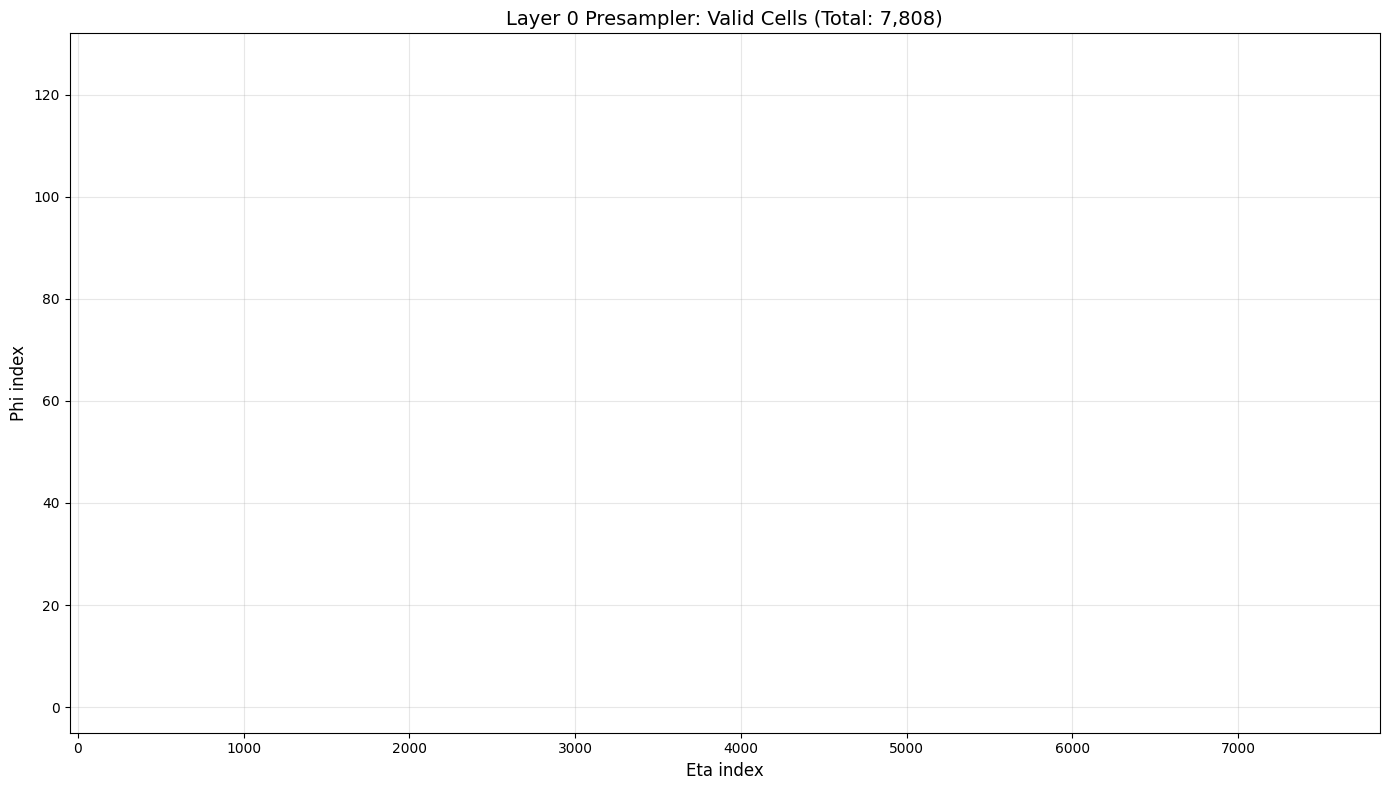

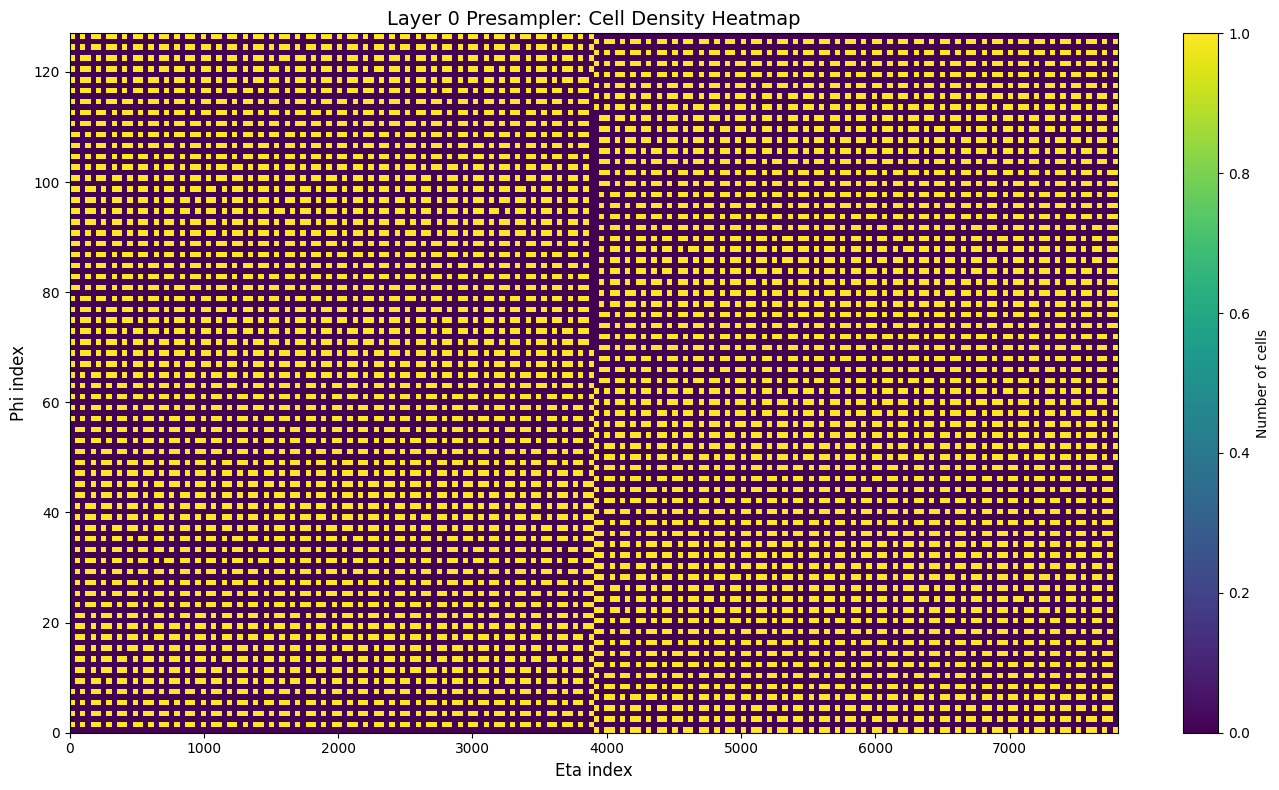

Sampling every 39 eta indices for clarity


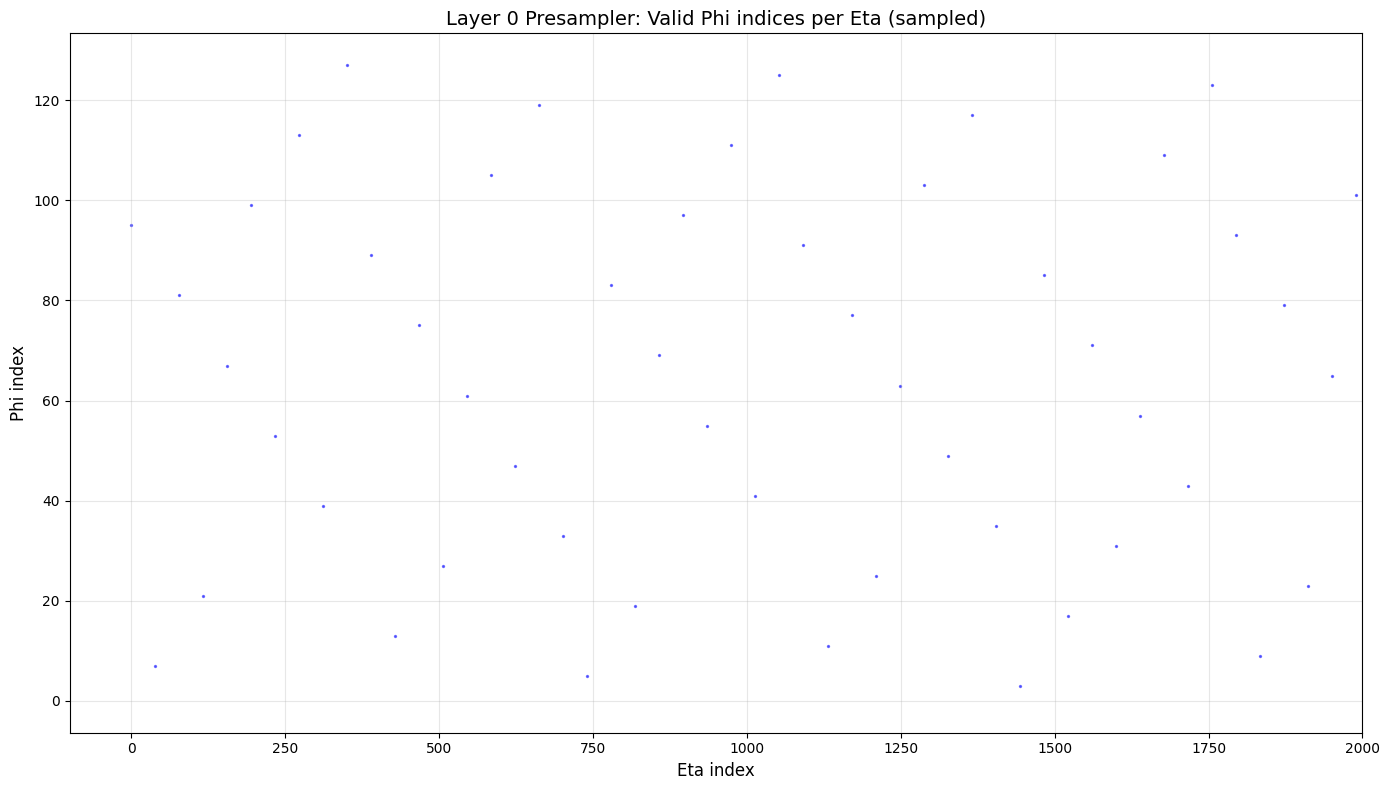

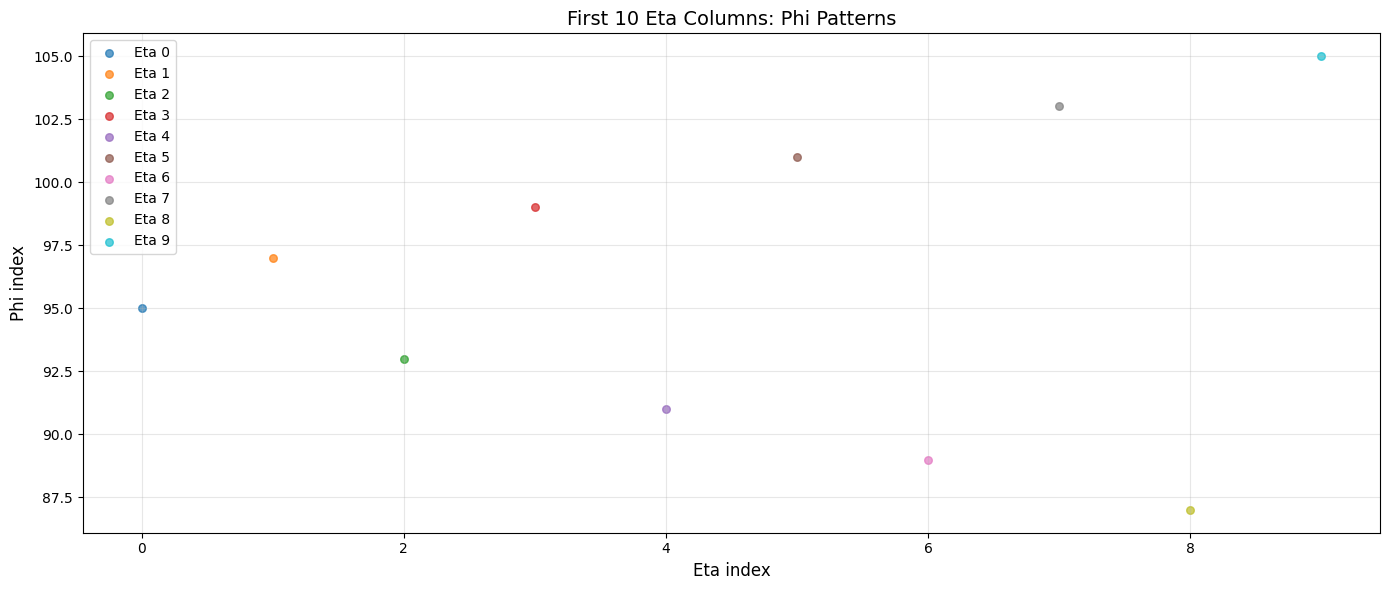

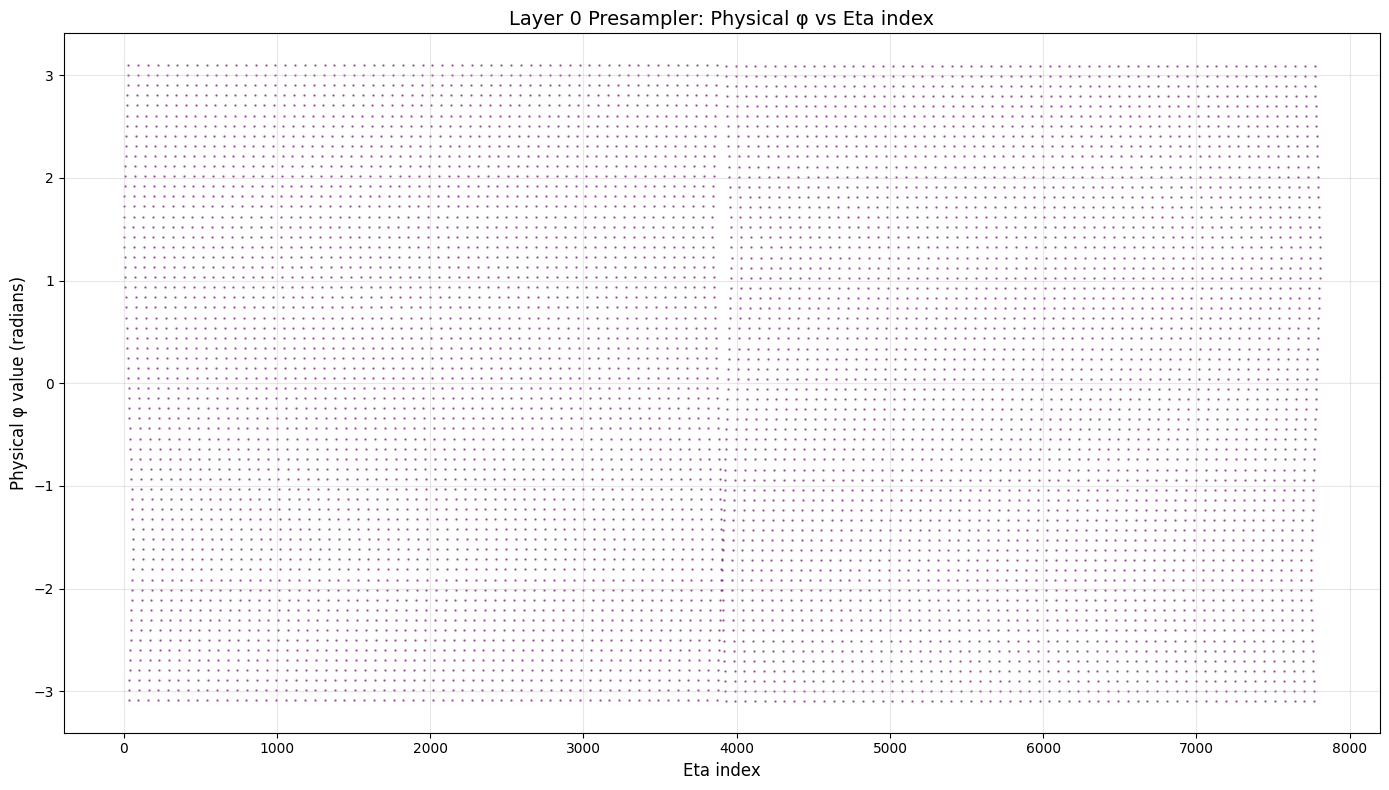


DATA STATISTICS
Array shape: (128, 7808)
Total cells: 999,424
Valid cells: 7,808 (0.8%)
Eta range: 0 to 7807
Phi range: 0 to 127
Unique phi indices with data: 128
Unique eta indices with data: 7808

Checking regularity of phi indices per eta:
  Eta 0: 1 valid phi indices
  Eta 1: 1 valid phi indices
  Eta 2: 1 valid phi indices
  Eta 3: 1 valid phi indices
  Eta 4: 1 valid phi indices


In [39]:
# ---------------------------------------------------------------------
# Plot in INDEX SPACE - All valid cells
# ---------------------------------------------------------------------
plt.figure(figsize=(14, 8))

# Get all valid points
valid_points = np.argwhere(~np.isnan(cells_phi))
phi_indices = valid_points[:, 0]
eta_indices = valid_points[:, 1]

# Create scatter plot
plt.scatter(eta_indices, phi_indices, s=0.5, c='b', alpha=0.6, marker='s')
plt.xlabel("Eta index", fontsize=12)
plt.ylabel("Phi index", fontsize=12)
plt.title(f"Layer 0 Presampler: Valid Cells (Total: {len(valid_points):,})", fontsize=14)
plt.grid(True, alpha=0.3)

# Set appropriate axis limits
plt.xlim(-50, np.max(eta_indices) + 50)
plt.ylim(-5, np.max(phi_indices) + 5)

plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# Plot 2: Heatmap to see density and patterns
# ---------------------------------------------------------------------
plt.figure(figsize=(14, 8))

# Create a 2D histogram of valid cells
plt.hist2d(eta_indices, phi_indices, bins=[200, 128], 
           cmap='viridis', range=[[0, np.max(eta_indices)], [0, 127]])
plt.colorbar(label='Number of cells')
plt.xlabel("Eta index", fontsize=12)
plt.ylabel("Phi index", fontsize=12)
plt.title("Layer 0 Presampler: Cell Density Heatmap", fontsize=14)

plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# Plot 3: Per-eta distribution (your original approach, corrected)
# ---------------------------------------------------------------------
plt.figure(figsize=(14, 8))

n_eta = cells_phi.shape[1]
n_phi = cells_phi.shape[0]

# Sample every Nth eta for clarity (since 7808 is too many to plot individually)
sampling_step = max(1, n_eta // 200)  # Plot ~200 eta points max
print(f"Sampling every {sampling_step} eta indices for clarity")

for ieta in range(0, n_eta, sampling_step):
    # Find valid phi indices in this eta column
    mask = ~np.isnan(cells_phi[:, ieta])
    
    if np.any(mask):
        # Get the actual phi indices that are valid
        valid_phi_indices = np.where(mask)[0]
        
        # Plot all valid phi indices for this eta
        plt.scatter(
            np.full(len(valid_phi_indices), ieta),
            valid_phi_indices,
            s=2,
            c="b",
            alpha=0.5
        )

plt.xlabel("Eta index", fontsize=12)
plt.ylabel("Phi index", fontsize=12)
plt.title(f"Layer 0 Presampler: Valid Phi indices per Eta (sampled)", fontsize=14)
plt.grid(True, alpha=0.3)
plt.xlim(-100, np.min([n_eta, 2000]))  # Show first 2000 eta for clarity

plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# Plot 4: Check if all eta columns have the same phi pattern
# ---------------------------------------------------------------------
plt.figure(figsize=(14, 6))

# Check pattern in first few eta columns
n_to_check = min(10, n_eta)
colors = plt.cm.tab10(np.linspace(0, 1, n_to_check))

for ieta in range(n_to_check):
    mask = ~np.isnan(cells_phi[:, ieta])
    valid_phi_indices = np.where(mask)[0]
    
    plt.scatter(
        np.full(len(valid_phi_indices), ieta),
        valid_phi_indices,
        s=30,
        c=[colors[ieta]],
        label=f'Eta {ieta}',
        alpha=0.7
    )

plt.xlabel("Eta index", fontsize=12)
plt.ylabel("Phi index", fontsize=12)
plt.title(f"First {n_to_check} Eta Columns: Phi Patterns", fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# Plot 5: Physical phi values vs eta (if you want to see the actual angles)
# ---------------------------------------------------------------------
plt.figure(figsize=(14, 8))

# Get physical phi values for valid cells
phi_values = cells_phi[~np.isnan(cells_phi)]

# Create scatter plot of physical phi vs eta
plt.scatter(eta_indices, phi_values, s=0.5, c='purple', alpha=0.6)
plt.xlabel("Eta index", fontsize=12)
plt.ylabel("Physical φ value (radians)", fontsize=12)
plt.title(f"Layer 0 Presampler: Physical φ vs Eta index", fontsize=14)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# Debug: Print statistics about the data
# ---------------------------------------------------------------------
print("\n" + "="*60)
print("DATA STATISTICS")
print("="*60)
print(f"Array shape: {cells_phi.shape}")
print(f"Total cells: {cells_phi.size:,}")
print(f"Valid cells: {len(valid_points):,} ({100*len(valid_points)/cells_phi.size:.1f}%)")
print(f"Eta range: 0 to {n_eta-1}")
print(f"Phi range: 0 to {n_phi-1}")
print(f"Unique phi indices with data: {len(np.unique(phi_indices))}")
print(f"Unique eta indices with data: {len(np.unique(eta_indices))}")

# Check if pattern is regular
print("\nChecking regularity of phi indices per eta:")
first_few_eta = min(5, n_eta)
for ieta in range(first_few_eta):
    mask = ~np.isnan(cells_phi[:, ieta])
    valid_count = np.sum(mask)
    print(f"  Eta {ieta}: {valid_count} valid phi indices")

(2, 7808)


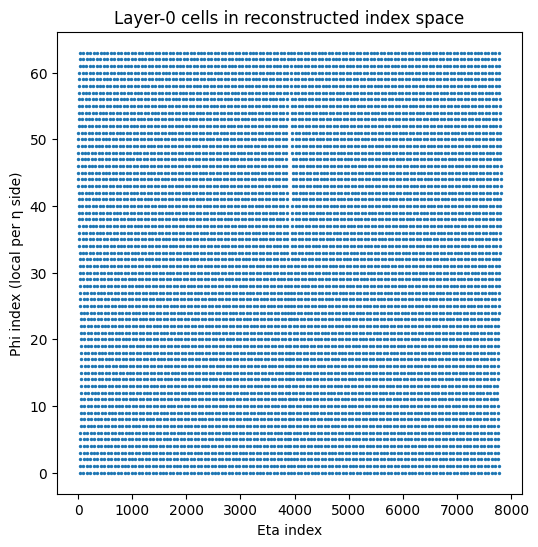

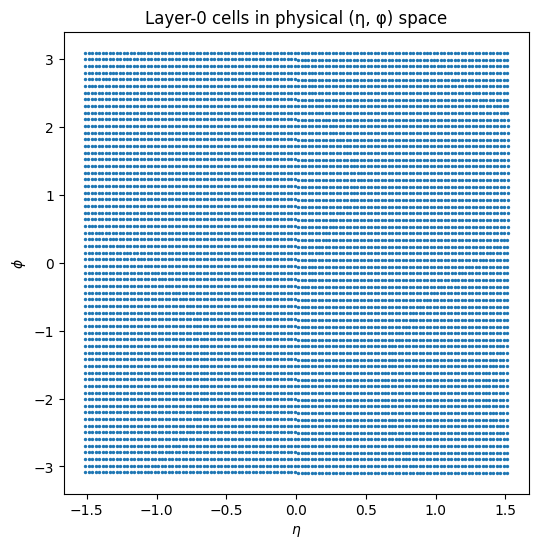

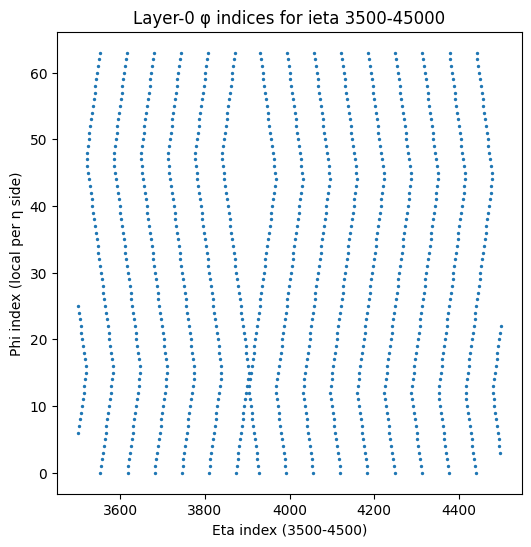

In [40]:
# -------------------------------------------------
# Input data
# -------------------------------------------------
eta_vals = np.asarray(df_layer0.eta)
phi_vals = np.asarray(df_layer0.phi)

N = len(eta_vals)

# Optional stack (for completeness / downstream use)
all_cells = np.stack((eta_vals, phi_vals), axis=0)
print(all_cells.shape)   # (2, N)

# -------------------------------------------------
# ETA indexing (single global lattice — this is OK)
# -------------------------------------------------
eta_centers = np.sort(np.unique(eta_vals))

def nearest_index(values, centers):
    idx = np.searchsorted(centers, values, side="left")
    return np.clip(idx, 0, len(centers) - 1)

eta_idx = nearest_index(eta_vals, eta_centers)

# -------------------------------------------------
# PHI indexing (two staggered lattices — REQUIRED)
# -------------------------------------------------
neg = eta_vals < 0
pos = eta_vals > 0

phi_idx = np.empty(N, dtype=int)

# Separate φ grids
phi_centers_neg = np.sort(np.unique(phi_vals[neg]))
phi_centers_pos = np.sort(np.unique(phi_vals[pos]))

phi_idx[neg] = np.searchsorted(phi_centers_neg, phi_vals[neg])
phi_idx[pos] = np.searchsorted(phi_centers_pos, phi_vals[pos])

# -------------------------------------------------
# Plot: reconstructed index space (geometry-faithful)
# -------------------------------------------------
plt.figure(figsize=(6, 6))
plt.scatter(eta_idx, phi_idx, s=2)
plt.xlabel("Eta index")
plt.ylabel("Phi index (local per η side)")
plt.title("Layer-0 cells in reconstructed index space")
plt.show()

# -------------------------------------------------
# Plot: physical (η, φ) space (sanity check)
# -------------------------------------------------
plt.figure(figsize=(6, 6))
plt.scatter(eta_vals, phi_vals, s=2)
plt.xlabel(r"$\eta$")
plt.ylabel(r"$\phi$")
plt.title("Layer-0 cells in physical (η, φ) space")
plt.show()


mask = (eta_idx >= 3500) & (eta_idx < 4500)

phi_idx_subset = phi_idx[mask]
eta_idx_subset = eta_idx[mask]

# Plot phi vs eta index (focused)
plt.figure(figsize=(6, 6))
plt.scatter(eta_idx_subset, phi_idx_subset, s=2)
plt.xlabel("Eta index (3500-4500)")
plt.ylabel("Phi index (local per η side)")
plt.title("Layer-0 φ indices for ieta 3500-45000")
plt.show()


In [8]:
bin_counts = (
    df_layer0.groupby(["eta", "phi"])
       .size()
       .reset_index(name="count")
)

bin_counts["count"].value_counts()

count
1    7808
Name: count, dtype: int64

In [9]:
df_layer0["eta_r"] = np.round(df_layer0["eta"] / 0.025) * 0.025
df_layer0["phi_r"] = np.round(df_layer0["phi"] / 0.1) * 0.1
df_layer0.head()

,eta,phi,subCalo,layer,energy,hashID,cluster_index,ieta,iphi,eta_r,phi_r
31872,-0.010511,0.050441,0.0,0.0,-79.215523,31872.0,0,3870,65,-0.0,0.1
31873,-0.010513,0.148633,0.0,0.0,53.713821,31873.0,0,3868,67,-0.0,0.1
31874,-0.010515,0.246841,0.0,0.0,75.782516,31874.0,0,3866,69,-0.0,0.2
31875,-0.010516,0.345065,0.0,0.0,-62.191051,31875.0,0,3864,71,-0.0,0.3
31876,-0.010518,0.443304,0.0,0.0,-29.232899,31876.0,0,3862,73,-0.0,0.4


In [10]:
df_layer0["eta_r"] = np.round(df_layer0["eta"] / 0.025) * 0.025
df_layer0["phi_r"] = np.round(df_layer0["phi"] / 0.1) * 0.1

bin_counts = (
    df_layer0
      .groupby(["eta_r", "phi_r"])
      .size()
      .reset_index(name="count")
)

bin_counts["count"].value_counts()

count
1    7510
2     149
Name: count, dtype: int64

In [11]:
double_bins = bin_counts.query("count == 2")
print(double_bins.head())
print("--------------------------")
print(double_bins.tail())

     eta_r  phi_r  count
54  -1.500    0.1      2
117 -1.475    0.1      2
178 -1.450    0.1      2
241 -1.425    0.1      2
304 -1.400    0.1      2
--------------------------
      eta_r  phi_r  count
7433  1.425    3.1      2
7462  1.450   -0.3      2
7525  1.475   -0.3      2
7588  1.500   -0.3      2
7625  1.525   -0.3      2


In [12]:
example = double_bins.iloc[0]

df_layer0[
    (df_layer0["eta_r"] == example["eta_r"]) &
    (df_layer0["phi_r"] == example["phi_r"])
][["eta", "phi", "hashID"]]

,eta,phi,hashID
35712,-1.511814,0.050441,35712.0
35713,-1.511966,0.148633,35713.0


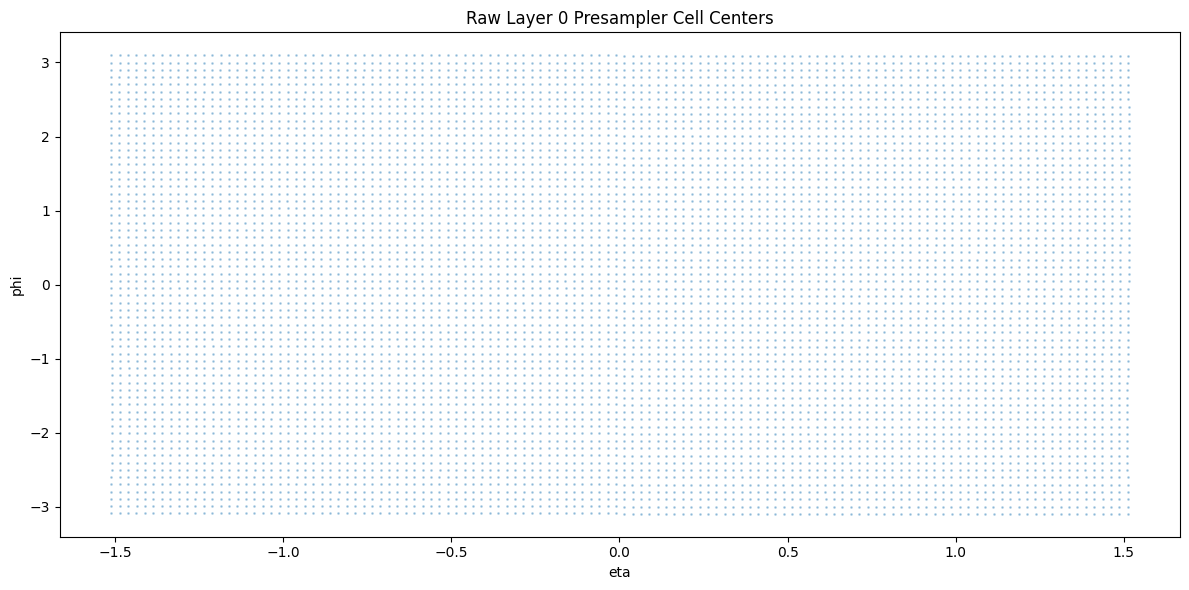

In [13]:
plt.figure(figsize=(12,6))
plt.scatter(df_layer0["eta"], df_layer0["phi"], s=1, alpha=0.3)
plt.xlabel("eta")
plt.ylabel("phi")
plt.title("Raw Layer 0 Presampler Cell Centers")
plt.tight_layout()
plt.show()

In [14]:
eta_vals = np.sort(df_layer0["eta_r"].unique())
phi_vals = np.sort(df_layer0["phi_r"].unique())

full_grid = (
    pd.MultiIndex.from_product(
        [eta_vals, phi_vals],
        names=["eta_r", "phi_r"]
    )
    .to_frame(index=False)
)

grid_counts = full_grid.merge(
    bin_counts,
    on=["eta_r", "phi_r"],
    how="left"
)

grid_counts["count"] = grid_counts["count"].fillna(0)
grid_counts["count"].value_counts()

count
1.0    7510
2.0     149
0.0      90
Name: count, dtype: int64

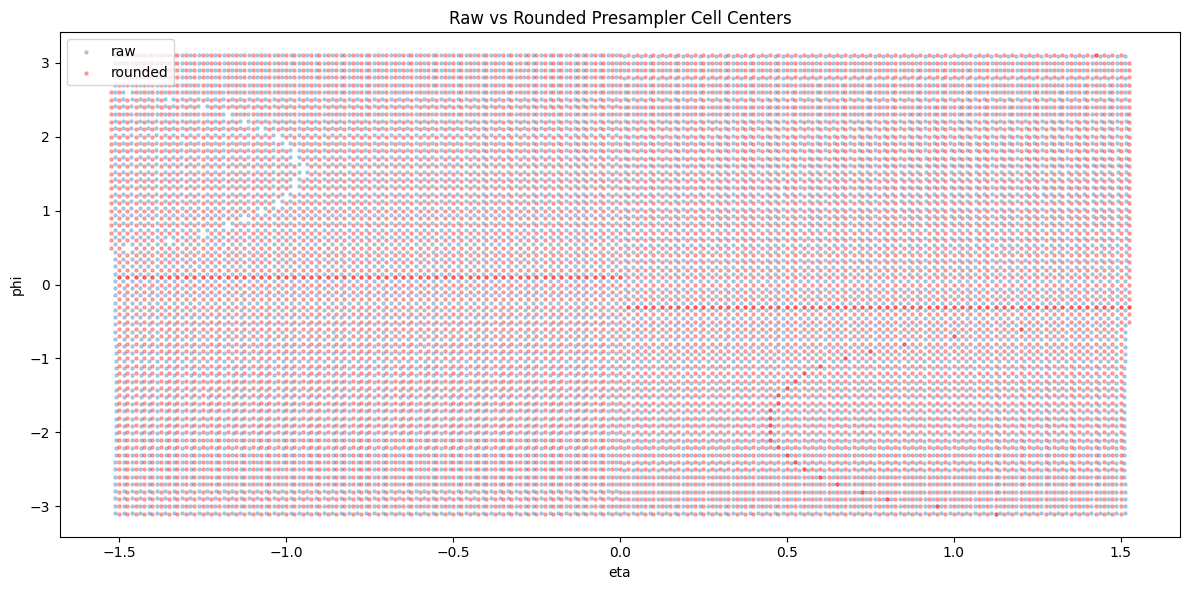

In [15]:
plt.figure(figsize=(12,6))
plt.scatter(df_layer0["eta"], df_layer0["phi"], s=5, alpha=0.3, label="raw")

plt.scatter(df_layer0["eta_r"], df_layer0["phi_r"],
            s=5, color="red", alpha=0.3, label="rounded")

plt.xlabel("eta")
plt.ylabel("phi")
plt.legend()
plt.title("Raw vs Rounded Presampler Cell Centers")
plt.tight_layout()
plt.show()

Number of Layer 1 cells: 58752


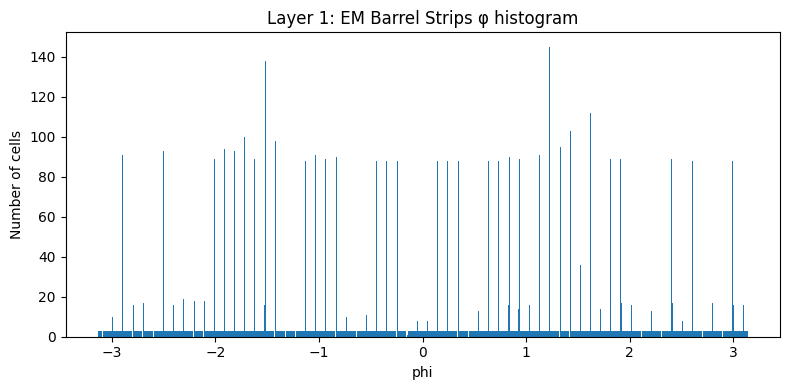

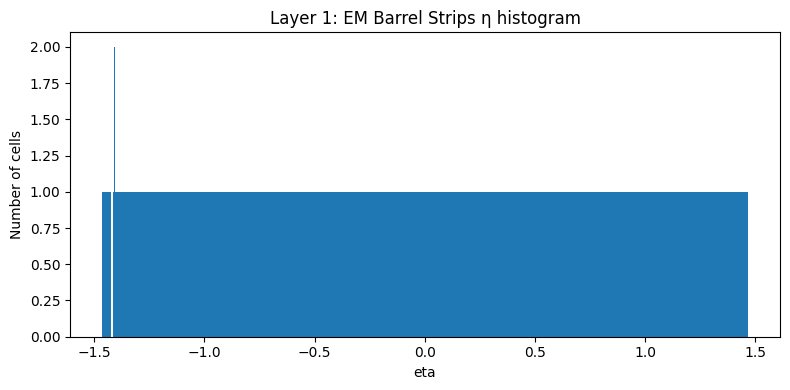

Number of eta bins: 917
Number of phi bins: 257


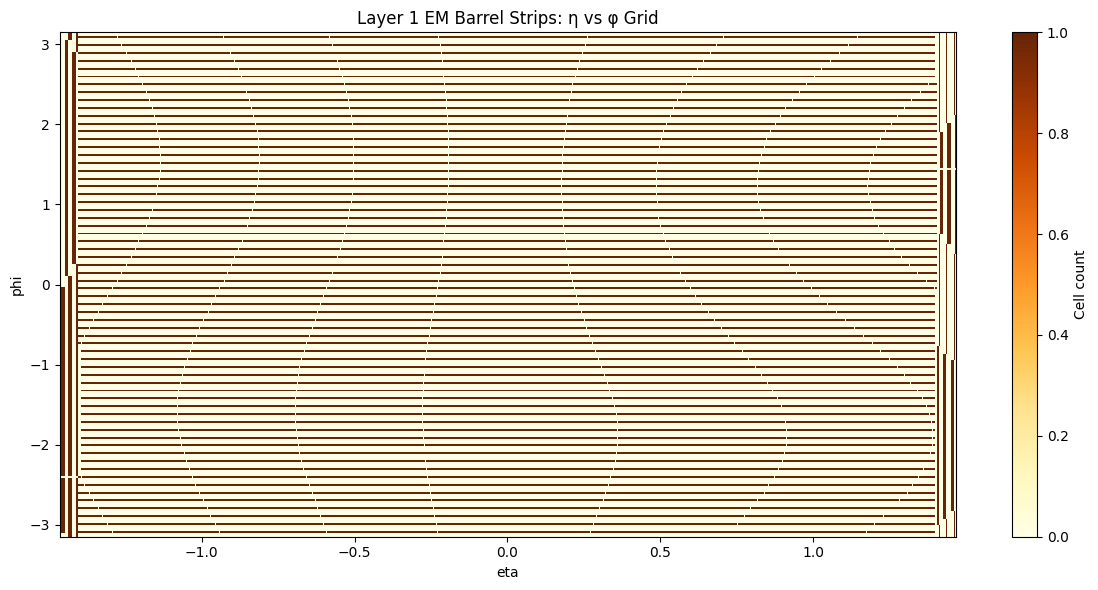

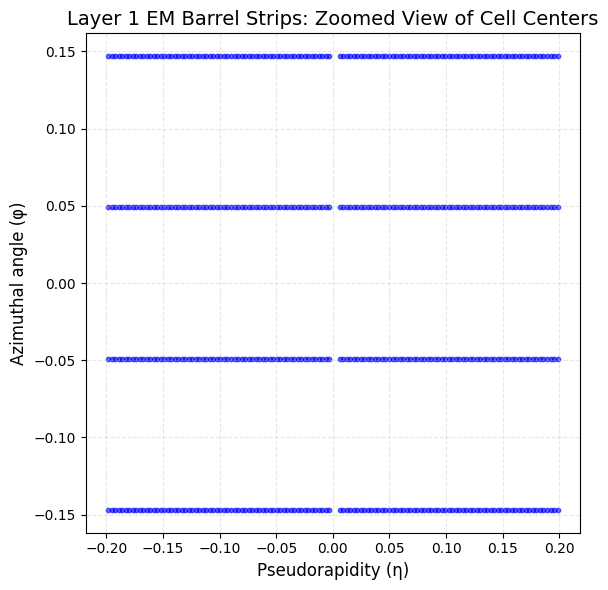

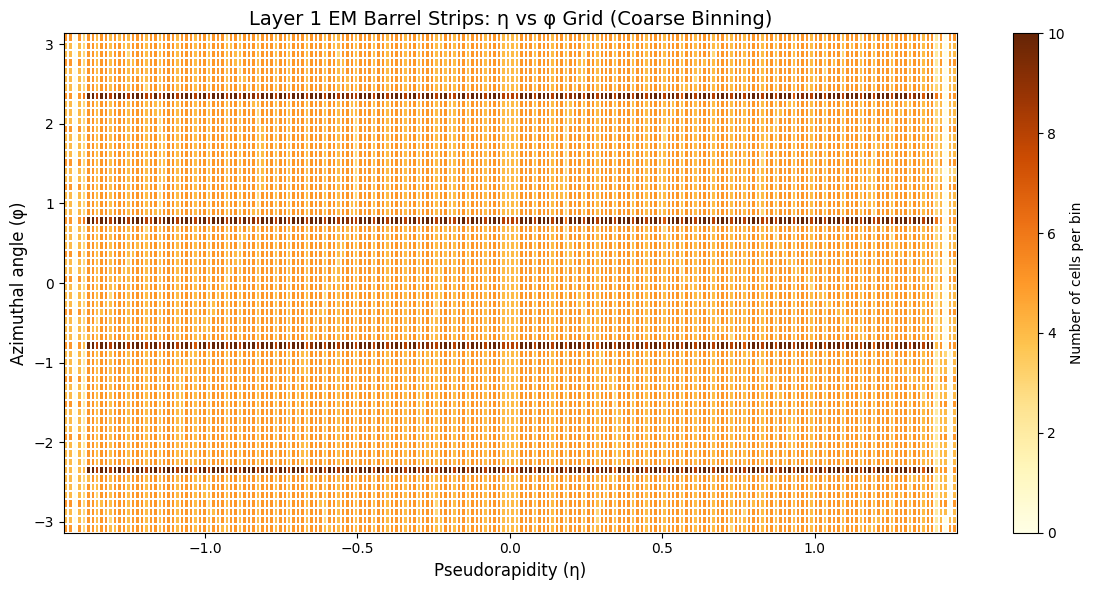

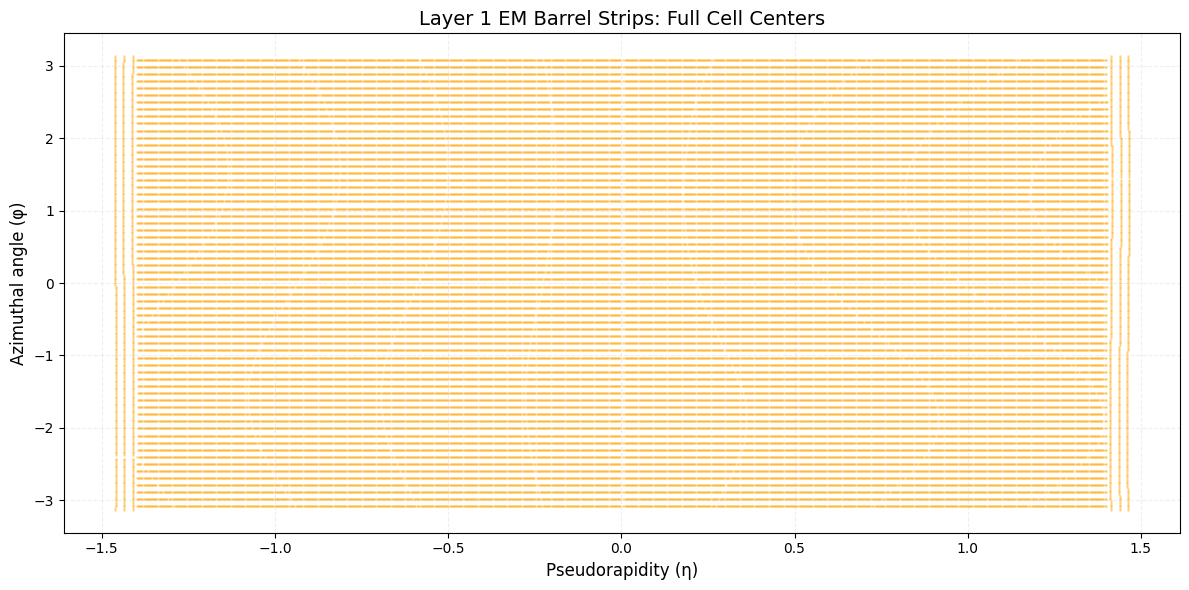

In [16]:
# -----------------------
# Layer 1 selection
# -----------------------
select = (df_cells["subCalo"] == 0) & (df_cells["layer"] == 1)
df_layer1 = df_cells[select].copy()

print("Number of Layer 1 cells:", len(df_layer1))
df_layer1.head()

# -----------------------
# Phi histogram (Layer 1)
# -----------------------
phi_values = np.sort(df_layer1["phi"].unique())

phi_edges = np.zeros(len(phi_values) + 1)
phi_edges[1:-1] = (phi_values[1:] + phi_values[:-1]) / 2
phi_edges[0] = phi_values[0] - (phi_values[1] - phi_values[0]) / 2
phi_edges[-1] = phi_values[-1] + (phi_values[-1] - phi_values[-2]) / 2

plt.figure(figsize=(8,4))
plt.hist(df_layer1["phi"], bins=phi_edges)
plt.xlabel("phi")
plt.ylabel("Number of cells")
plt.title("Layer 1: EM Barrel Strips φ histogram")
plt.tight_layout()
plt.show()


# -----------------------
# Eta histogram (Layer 1)
# -----------------------
eta_values = np.sort(df_layer1["eta"].unique())

eta_edges = np.zeros(len(eta_values) + 1)
eta_edges[1:-1] = (eta_values[1:] + eta_values[:-1]) / 2
eta_edges[0] = eta_values[0] - (eta_values[1] - eta_values[0]) / 2
eta_edges[-1] = eta_values[-1] + (eta_values[-1] - eta_values[-2]) / 2

plt.figure(figsize=(8,4))
plt.hist(df_layer1["eta"], bins=eta_edges)
plt.xlabel("eta")
plt.ylabel("Number of cells")
plt.title("Layer 1: EM Barrel Strips η histogram")
plt.tight_layout()
plt.show()

# -----------------------
# Round eta and phi to Layer 1 cell size
# -----------------------
eta_rounded = np.round(df_layer1["eta"] / 0.0031) * 0.0031
phi_rounded = np.round(df_layer1["phi"] / 0.0245) * 0.0245

num_eta_bins = len(np.unique(eta_rounded))
num_phi_bins = len(np.unique(phi_rounded))

print("Number of eta bins:", num_eta_bins)
print("Number of phi bins:", num_phi_bins)

# -----------------------
# 2D histogram / grid visualization (Layer 1)
# -----------------------
eta_vals = np.sort(np.unique(eta_rounded))
phi_vals = np.sort(np.unique(phi_rounded))

eta_edges = edges_from_centers(eta_vals)
phi_edges = edges_from_centers(phi_vals)

H, _, _ = np.histogram2d(
    eta_rounded,
    phi_rounded,
    bins=[eta_edges, phi_edges]
)

X, Y = np.meshgrid(eta_edges, phi_edges)

plt.figure(figsize=(12,6))
plt.pcolormesh(
    X, Y,
    H.T,
    cmap="YlOrBr",
    # edgecolors="white",
    linewidth=0.3
)

plt.colorbar(label="Cell count")
plt.xlabel("eta")
plt.ylabel("phi")
plt.title("Layer 1 EM Barrel Strips: η vs φ Grid")
plt.tight_layout()
plt.show()

eta_min, eta_max = -0.2, 0.2
phi_min, phi_max = -0.2, 0.2

mask = (eta_rounded >= eta_min) & (eta_rounded <= eta_max) & \
       (phi_rounded >= phi_min) & (phi_rounded <= phi_max)

plt.figure(figsize=(6,6))
plt.scatter(eta_rounded[mask], phi_rounded[mask], s=10, alpha=0.6, color='blue')
plt.xlabel("Pseudorapidity (η)", fontsize=12)
plt.ylabel("Azimuthal angle (φ)", fontsize=12)
plt.title("Layer 1 EM Barrel Strips: Zoomed View of Cell Centers", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

H, eta_edges_vis, phi_edges_vis = np.histogram2d(
    eta_rounded,
    phi_rounded,
    bins=[200, 60]
)

X, Y = np.meshgrid(eta_edges_vis, phi_edges_vis)

plt.figure(figsize=(12,6))
pcm = plt.pcolormesh(
    X, Y,
    H.T,
    cmap="YlOrBr",
    edgecolors="white",
    linewidth=0.3
)
plt.colorbar(pcm, label="Number of cells per bin")
plt.xlabel("Pseudorapidity (η)", fontsize=12)
plt.ylabel("Azimuthal angle (φ)", fontsize=12)
plt.title("Layer 1 EM Barrel Strips: η vs φ Grid (Coarse Binning)", fontsize=14)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
plt.scatter(eta_rounded, phi_rounded, s=1, alpha=0.3, color='orange')
plt.xlabel("Pseudorapidity (η)", fontsize=12)
plt.ylabel("Azimuthal angle (φ)", fontsize=12)
plt.title("Layer 1 EM Barrel Strips: Full Cell Centers", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()

Number of Layer 1 cells: 58752
Number of unique eta points: 58744
Number of unique phi points: 13492
Index-space histogram min / max: 0.0 1.0
Total cells in data: 58752.0


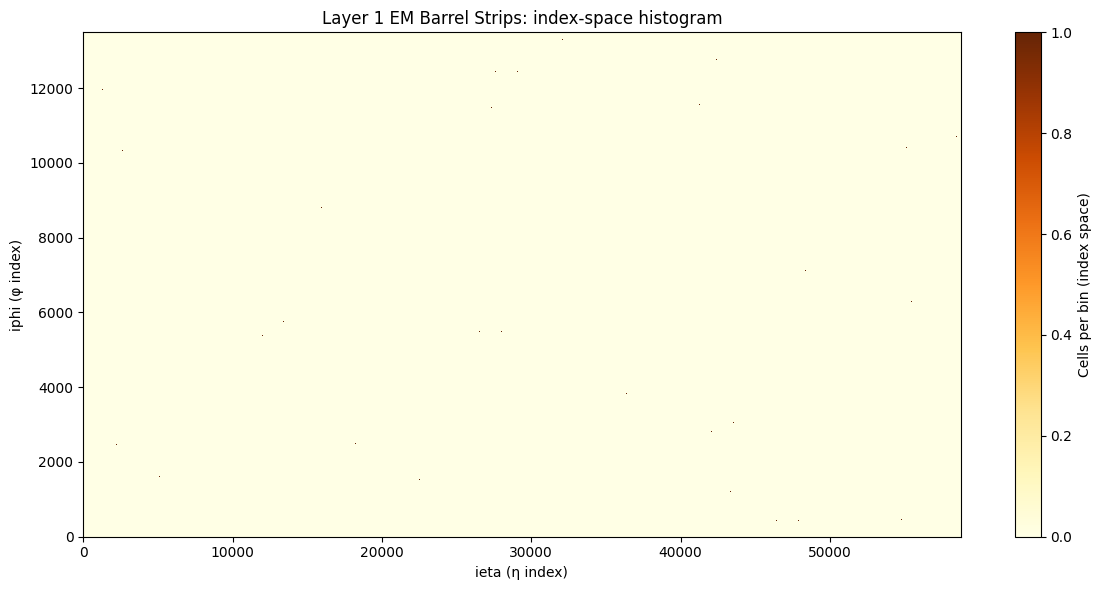

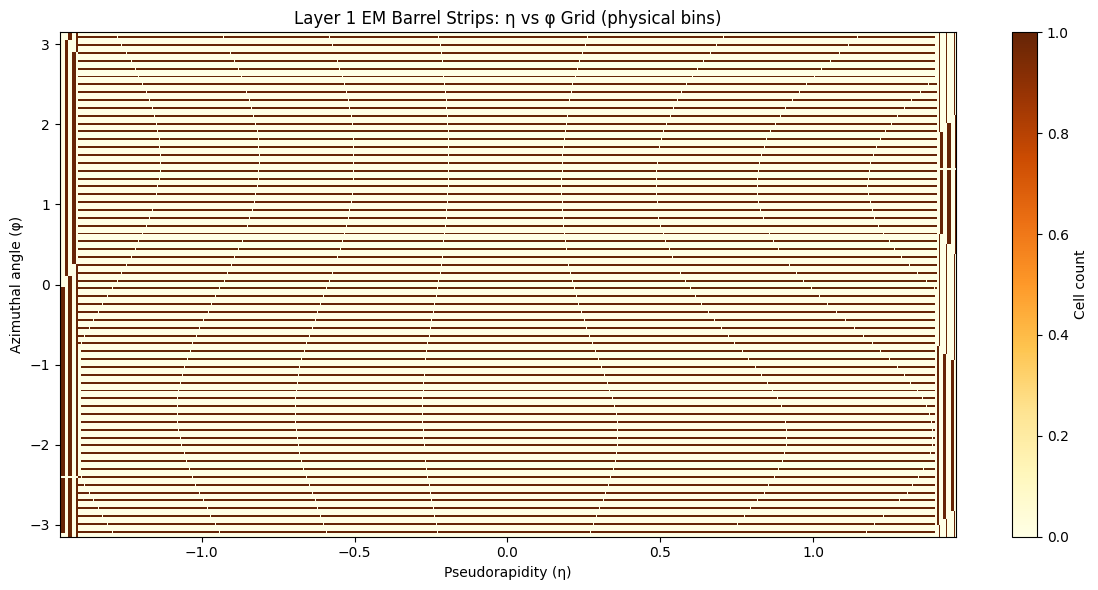

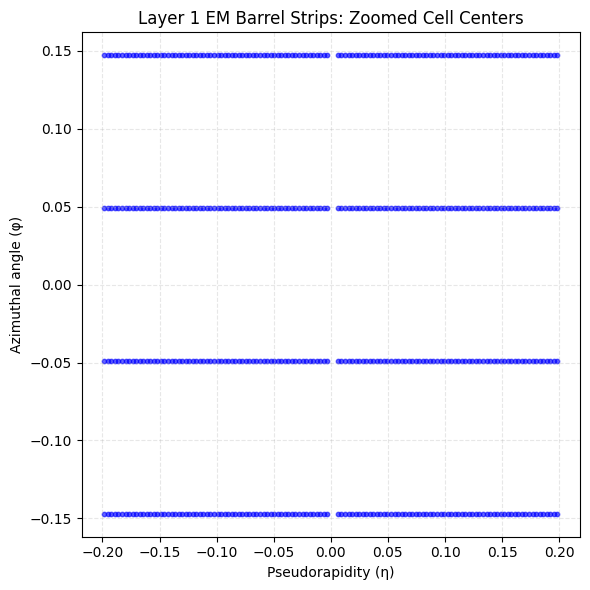

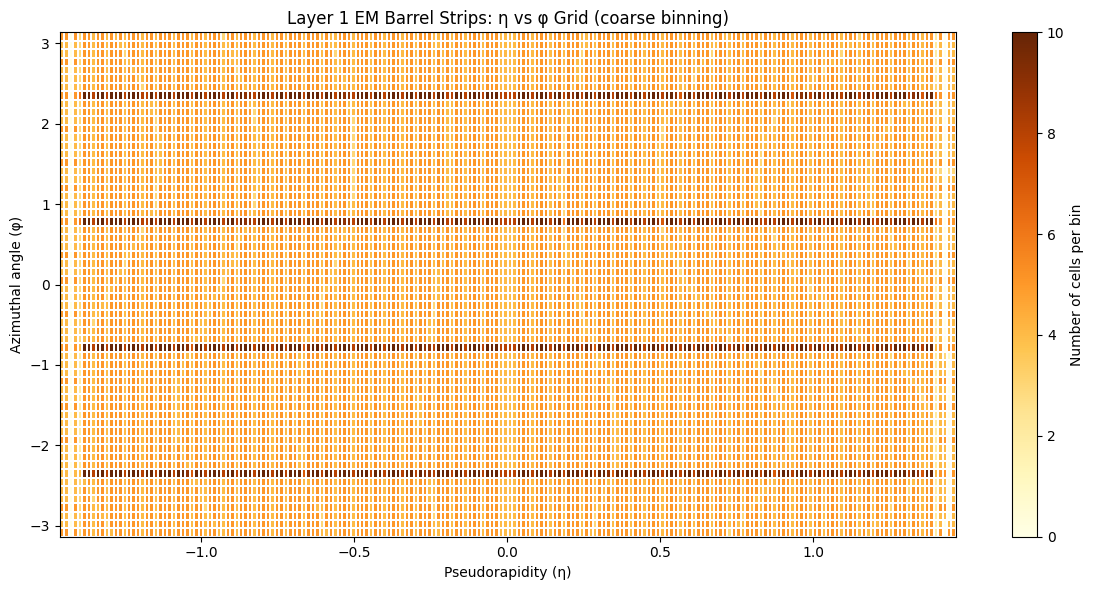

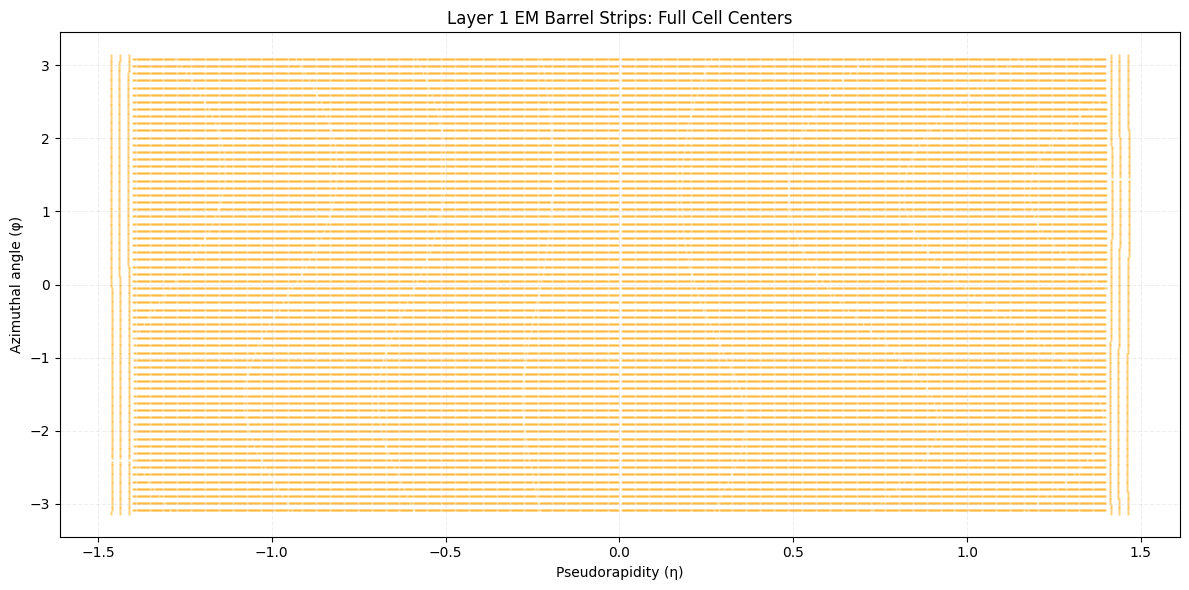

In [17]:
# =====================================================================
# Layer 1 (EM Barrel Strips) Geometry Exploration
# =====================================================================

# -----------------------
# Layer 1 selection
# -----------------------
df_layer1 = df_cells[(df_cells["subCalo"] == 0) & (df_cells["layer"] == 1)].copy()
print("Number of Layer 1 cells:", len(df_layer1))

# -----------------------
# Discover detector geometry from data
# -----------------------
# Unique eta and phi values correspond to true cell centers
eta_centers = np.sort(df_layer1["eta"].unique())
phi_centers = np.sort(df_layer1["phi"].unique())

print(f"Number of unique eta points: {len(eta_centers)}")
print(f"Number of unique phi points: {len(phi_centers)}")

# -----------------------
# Build index maps (topology in index space)
# -----------------------
# Map each unique eta/phi to integer indices for array-based plotting
eta_to_i = {v: i for i, v in enumerate(eta_centers)}
phi_to_i = {v: i for i, v in enumerate(phi_centers)}

df_layer1["ieta"] = df_layer1["eta"].map(eta_to_i)
df_layer1["iphi"] = df_layer1["phi"].map(phi_to_i)

# -----------------------
# Histogram in index space (debug / verification)
# -----------------------
# One bin per raw data point (may be very sparse due to fine granularity)
H_index, _, _ = np.histogram2d(
    df_layer1["ieta"],
    df_layer1["iphi"],
    bins=[len(eta_centers), len(phi_centers)]
)

print("Index-space histogram min / max:", H_index.min(), H_index.max())
print("Total cells in data:", H_index.sum())

plt.figure(figsize=(12,6))
plt.pcolormesh(H_index.T, cmap="YlOrBr")
plt.colorbar(label="Cells per bin (index space)")
plt.xlabel("ieta (η index)")
plt.ylabel("iphi (φ index)")
plt.title("Layer 1 EM Barrel Strips: index-space histogram")
plt.tight_layout()
plt.show()

# -----------------------
# Map back to physical strip widths (coarse binning)
# -----------------------
# Layer 1 physical bin widths
eta_binwidth = 0.0031
phi_binwidth = 0.0245

eta_plot = np.round(df_layer1['eta'] / eta_binwidth) * eta_binwidth
phi_plot = np.round(df_layer1['phi'] / phi_binwidth) * phi_binwidth

# Histogram with physical binning
eta_vals = np.sort(np.unique(eta_plot))
phi_vals = np.sort(np.unique(phi_plot))

eta_edges = edges_from_centers(eta_vals)
phi_edges = edges_from_centers(phi_vals)

H, _, _ = np.histogram2d(eta_plot, phi_plot, bins=[eta_edges, phi_edges])
X, Y = np.meshgrid(eta_edges, phi_edges)

plt.figure(figsize=(12,6))
plt.pcolormesh(
    X, Y, H.T,
    cmap="YlOrBr"
)
plt.colorbar(label="Cell count")
plt.xlabel("Pseudorapidity (η)")
plt.ylabel("Azimuthal angle (φ)")
plt.title("Layer 1 EM Barrel Strips: η vs φ Grid (physical bins)")
plt.tight_layout()
plt.show()

# -----------------------
# Zoomed view for detailed inspection
# -----------------------
eta_min, eta_max = -0.2, 0.2
phi_min, phi_max = -0.2, 0.2

mask = (eta_plot >= eta_min) & (eta_plot <= eta_max) & \
       (phi_plot >= phi_min) & (phi_plot <= phi_max)

plt.figure(figsize=(6,6))
plt.scatter(eta_plot[mask], phi_plot[mask], s=10, alpha=0.6, color='blue')
plt.xlabel("Pseudorapidity (η)")
plt.ylabel("Azimuthal angle (φ)")
plt.title("Layer 1 EM Barrel Strips: Zoomed Cell Centers")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# -----------------------
# Full coarse-binned visualization for presentation
# -----------------------
H_vis, eta_edges_vis, phi_edges_vis = np.histogram2d(
    eta_plot, phi_plot,
    bins=[200, 60]  # coarse binning for clean visualization
)

X_vis, Y_vis = np.meshgrid(eta_edges_vis, phi_edges_vis)

plt.figure(figsize=(12,6))
pcm = plt.pcolormesh(
    X_vis, Y_vis,
    H_vis.T,
    cmap="YlOrBr",
    edgecolors="white",
    linewidth=0.3
)
plt.colorbar(pcm, label="Number of cells per bin")
plt.xlabel("Pseudorapidity (η)")
plt.ylabel("Azimuthal angle (φ)")
plt.title("Layer 1 EM Barrel Strips: η vs φ Grid (coarse binning)")
plt.tight_layout()
plt.show()

# -----------------------
# Scatter plot of all cell centers
# -----------------------
plt.figure(figsize=(12,6))
plt.scatter(eta_plot, phi_plot, s=1, alpha=0.3, color='orange')
plt.xlabel("Pseudorapidity (η)")
plt.ylabel("Azimuthal angle (φ)")
plt.title("Layer 1 EM Barrel Strips: Full Cell Centers")
plt.grid(True, linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()


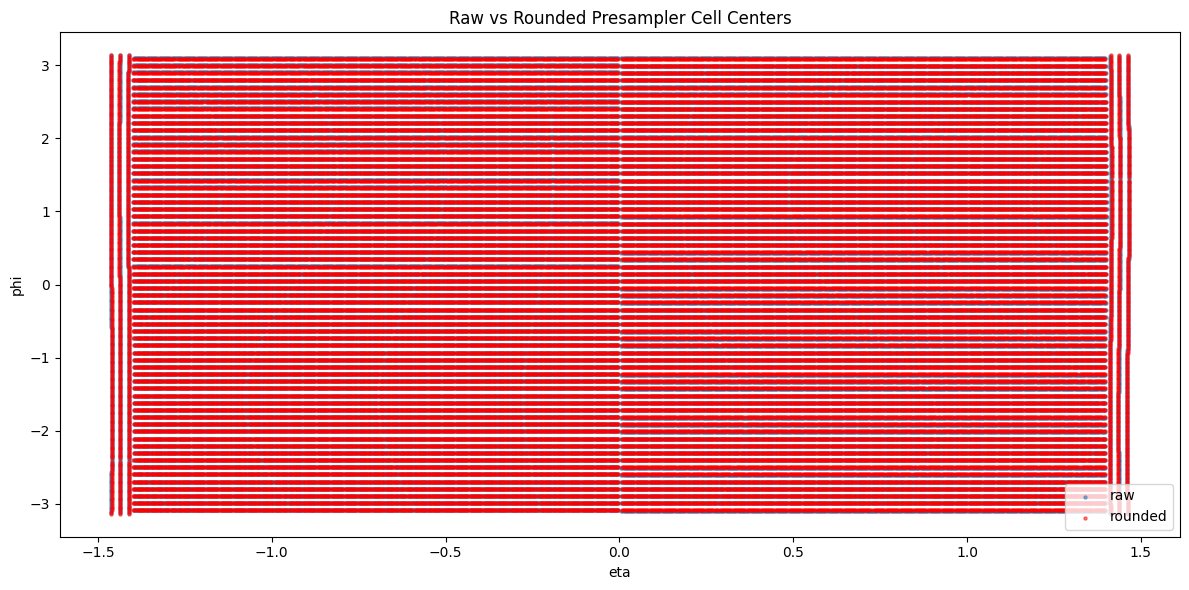

In [18]:
eta_binwidth = 0.0031
phi_binwidth = 0.0245

df_layer1["eta_r"] = np.round(df_layer1["eta"] / eta_binwidth) * eta_binwidth
df_layer1["phi_r"] = np.round(df_layer1["phi"] / phi_binwidth) * phi_binwidth


plt.figure(figsize=(12,6))
plt.scatter(df_layer1["eta"], df_layer1["phi"], s=5, alpha=0.5, label="raw")

plt.scatter(df_layer1["eta_r"], df_layer1["phi_r"],
            s=5, color="red", alpha=0.5, label="rounded")

plt.xlabel("eta")
plt.ylabel("phi")
plt.legend()
plt.title("Raw vs Rounded Presampler Cell Centers")
plt.tight_layout()
plt.show()

In [9]:
def analyze_calo_layer_custom(df_cells, subcalo, layer, 
                              eta_round_factor, 
                              phi_round_factor,
                              include_scatter_zoom=True,
                              zoom_range=0.2):
    """
    Analyze a specific subcalo and layer with customizable rounding factors.
    
    Parameters:
    -----------
    df_cells : pandas.DataFrame
        DataFrame containing calorimeter cell data
    subcalo : int
        Subcalorimeter index
    layer : int
        Layer number within the subcalorimeter
    eta_round_factor : float, default=0.0031
        Rounding factor for eta values
    phi_round_factor : float, default=0.0245
        Rounding factor for phi values
    include_scatter_zoom : bool, default=True
        Whether to include the zoomed scatter plot
    zoom_range : float, default=0.2
        Range for the zoomed scatter plot (±zoom_range from origin)
    """
    
    # -----------------------
    # Data selection
    # -----------------------
    select = (df_cells["subCalo"] == subcalo) & (df_cells["layer"] == layer)
    df_selected = df_cells[select].copy()
    
    print(f"Number of Layer {layer} cells in subCalo {subcalo}: {len(df_selected)}")
    
    # Helper function for edge calculation
    def edges_from_centers(centers):
        edges = np.zeros(len(centers) + 1)
        edges[1:-1] = (centers[1:] + centers[:-1]) / 2
        edges[0] = centers[0] - (centers[1] - centers[0]) / 2
        edges[-1] = centers[-1] + (centers[-1] - centers[-2]) / 2
        return edges
    
    # -----------------------
    # Phi histogram
    # -----------------------
    phi_values = np.sort(df_selected["phi"].unique())
    phi_edges = edges_from_centers(phi_values)
    
    plt.figure(figsize=(8,4))
    plt.hist(df_selected["phi"], bins=phi_edges)
    plt.xlabel("phi")
    plt.ylabel("Number of cells")
    plt.title(f"SubCalo {subcalo} Layer {layer}: φ histogram")
    plt.tight_layout()
    plt.show()
    
    # -----------------------
    # Eta histogram
    # -----------------------
    eta_values = np.sort(df_selected["eta"].unique())
    eta_edges = edges_from_centers(eta_values)
    
    plt.figure(figsize=(8,4))
    plt.hist(df_selected["eta"], bins=eta_edges)
    plt.xlabel("eta")
    plt.ylabel("Number of cells")
    plt.title(f"SubCalo {subcalo} Layer {layer}: η histogram")
    plt.tight_layout()
    plt.show()
    
    # -----------------------
    # Round eta and phi with custom factors
    # -----------------------
    eta_rounded = np.round(df_selected["eta"] / eta_round_factor) * eta_round_factor
    phi_rounded = np.round(df_selected["phi"] / phi_round_factor) * phi_round_factor
    
    num_eta_bins = len(np.unique(eta_rounded))
    num_phi_bins = len(np.unique(phi_rounded))
    
    print(f"Number of eta bins: {num_eta_bins}")
    print(f"Number of phi bins: {num_phi_bins}")
    
    # -----------------------
    # 2D histogram / grid visualization
    # -----------------------
    eta_vals = np.sort(np.unique(eta_rounded))
    phi_vals = np.sort(np.unique(phi_rounded))
    
    eta_edges_grid = edges_from_centers(eta_vals)
    phi_edges_grid = edges_from_centers(phi_vals)
    
    H, _, _ = np.histogram2d(
        eta_rounded,
        phi_rounded,
        bins=[eta_edges_grid, phi_edges_grid]
    )
    
    X, Y = np.meshgrid(eta_edges_grid, phi_edges_grid)
    
    plt.figure(figsize=(12,6))
    plt.pcolormesh(
        X, Y,
        H.T,
        cmap="YlOrBr",
        linewidth=0.3
    )
    
    plt.colorbar(label="Cell count")
    plt.xlabel("eta")
    plt.ylabel("phi")
    plt.title(f"SubCalo {subcalo} Layer {layer}: η vs φ Grid (η_bin={eta_round_factor}, φ_bin={phi_round_factor})")
    plt.tight_layout()
    plt.show()
    
    # -----------------------
    # Zoomed scatter plot (optional)
    # -----------------------
    if include_scatter_zoom:
        eta_min, eta_max = -zoom_range, zoom_range
        phi_min, phi_max = -zoom_range, zoom_range
        
        mask = (eta_rounded >= eta_min) & (eta_rounded <= eta_max) & \
               (phi_rounded >= phi_min) & (phi_rounded <= phi_max)
        
        plt.figure(figsize=(6,6))
        plt.scatter(eta_rounded[mask], phi_rounded[mask], s=10, alpha=0.6, color='blue')
        plt.xlabel("Pseudorapidity (η)", fontsize=12)
        plt.ylabel("Azimuthal angle (φ)", fontsize=12)
        plt.title(f"SubCalo {subcalo} Layer {layer}: Zoomed View (±{zoom_range})", fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    # -----------------------
    # Full scatter plot
    # -----------------------
    plt.figure(figsize=(12,6))
    plt.scatter(eta_rounded, phi_rounded, s=1, alpha=0.3, color='orange')
    plt.xlabel("Pseudorapidity (η)", fontsize=12)
    plt.ylabel("Azimuthal angle (φ)", fontsize=12)
    plt.title(f"SubCalo {subcalo} Layer {layer}: Full Cell Centers", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.2)
    plt.tight_layout()
    plt.show()
    
    return df_selected, eta_rounded, phi_rounded

Number of Layer 2 cells in subCalo 0: 29184


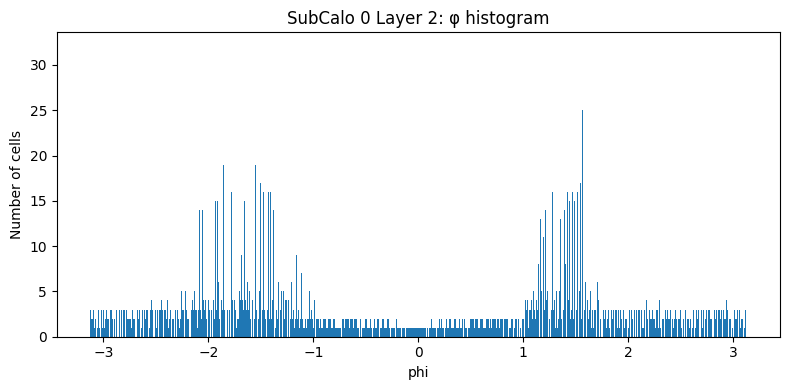

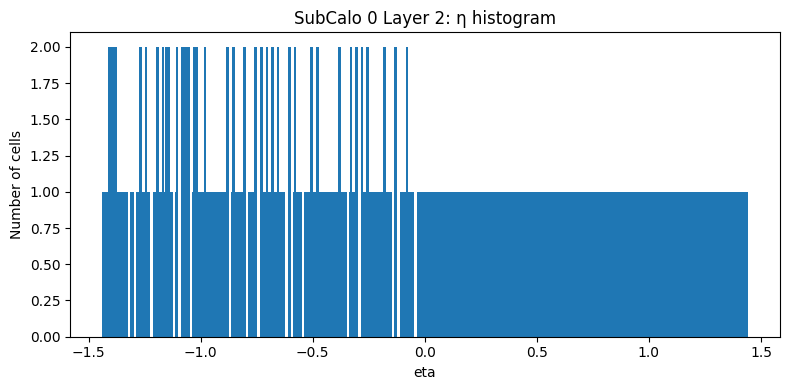

Number of eta bins: 117
Number of phi bins: 257


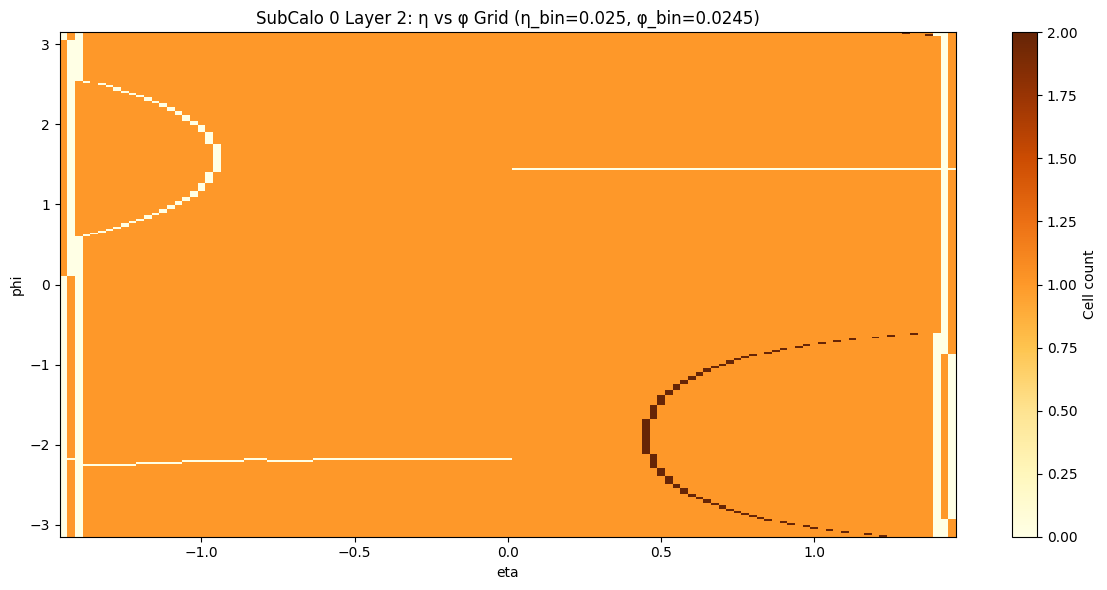

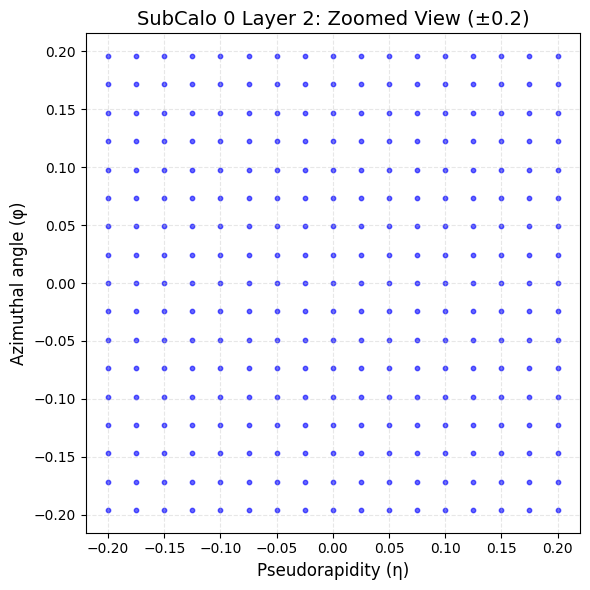

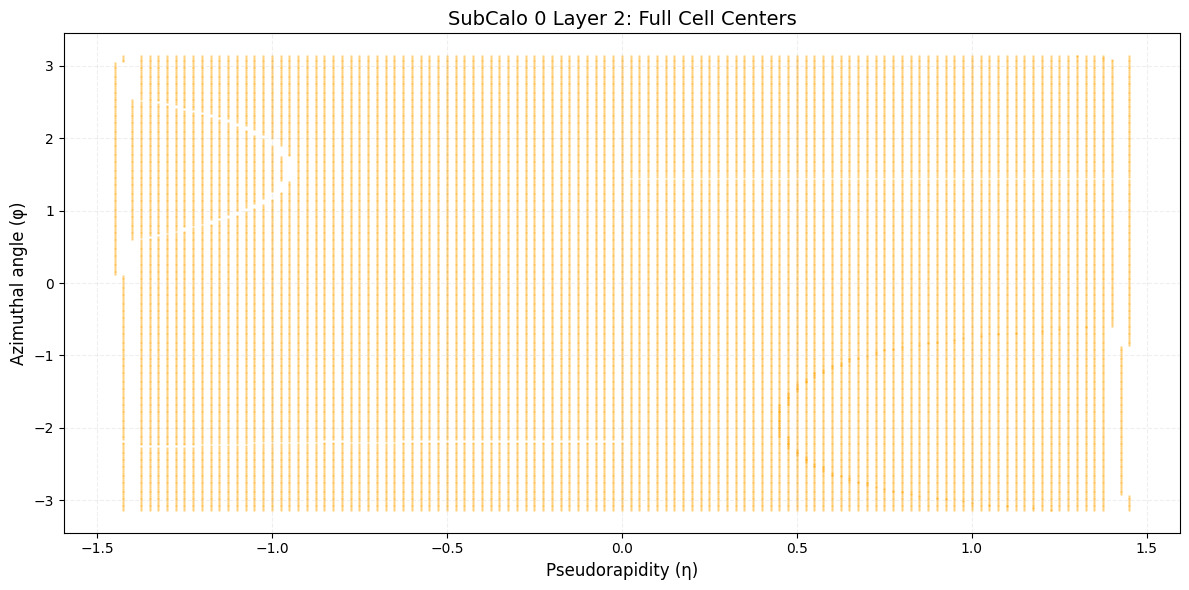

In [7]:
df_filtered, eta_rounded, phi_rounded = analyze_calo_layer_custom(df_cells, subcalo=0, layer=2, 
                                                                  eta_round_factor=0.025, 
                                                                  phi_round_factor=0.0245)

Number of Layer 3 cells in subCalo 0: 13824


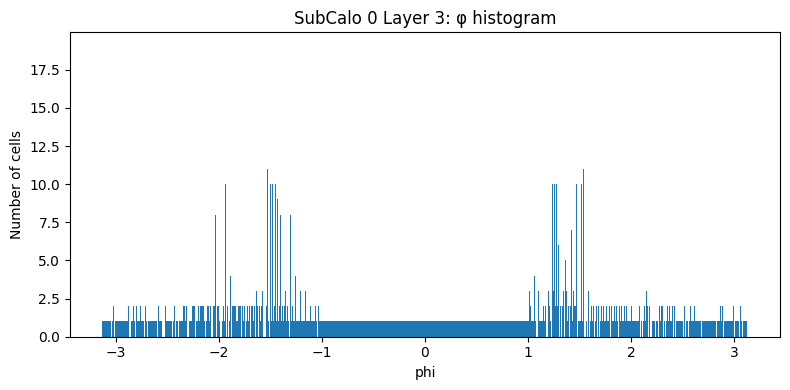

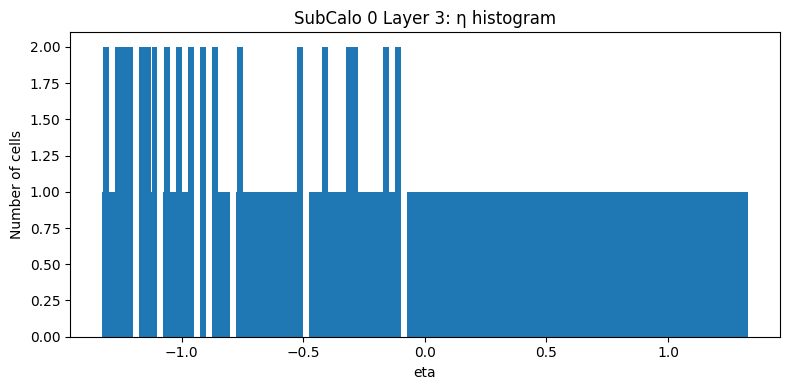

Number of eta bins: 55
Number of phi bins: 257


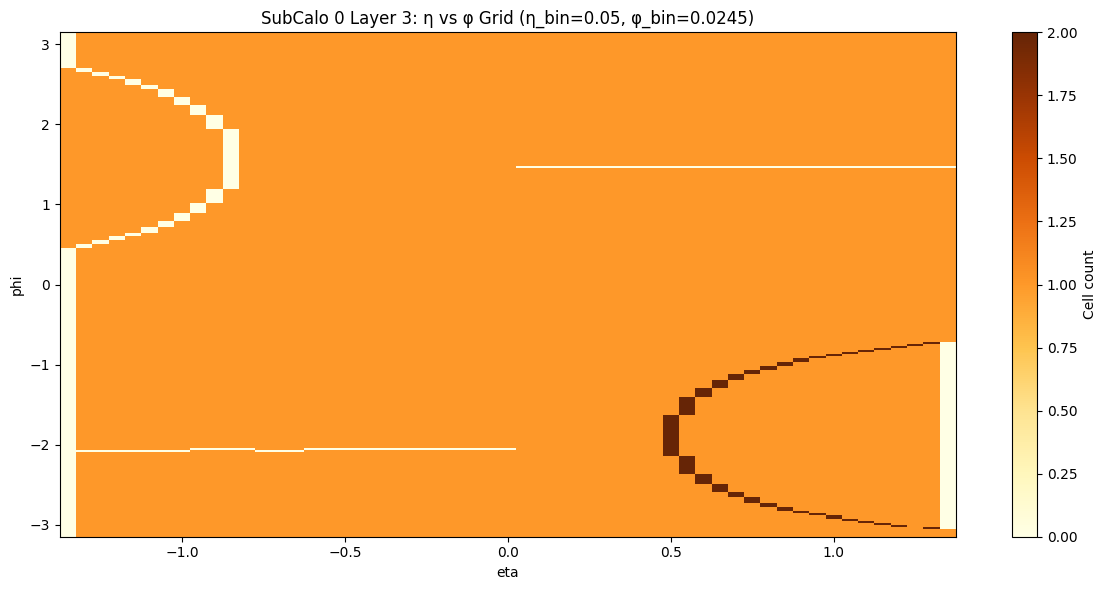

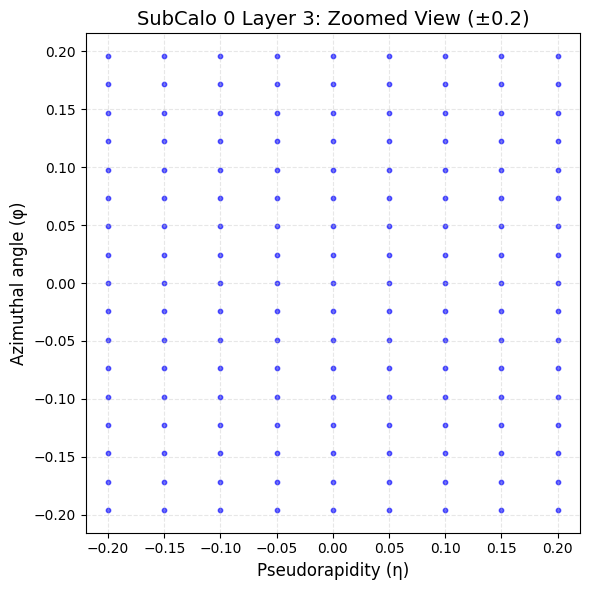

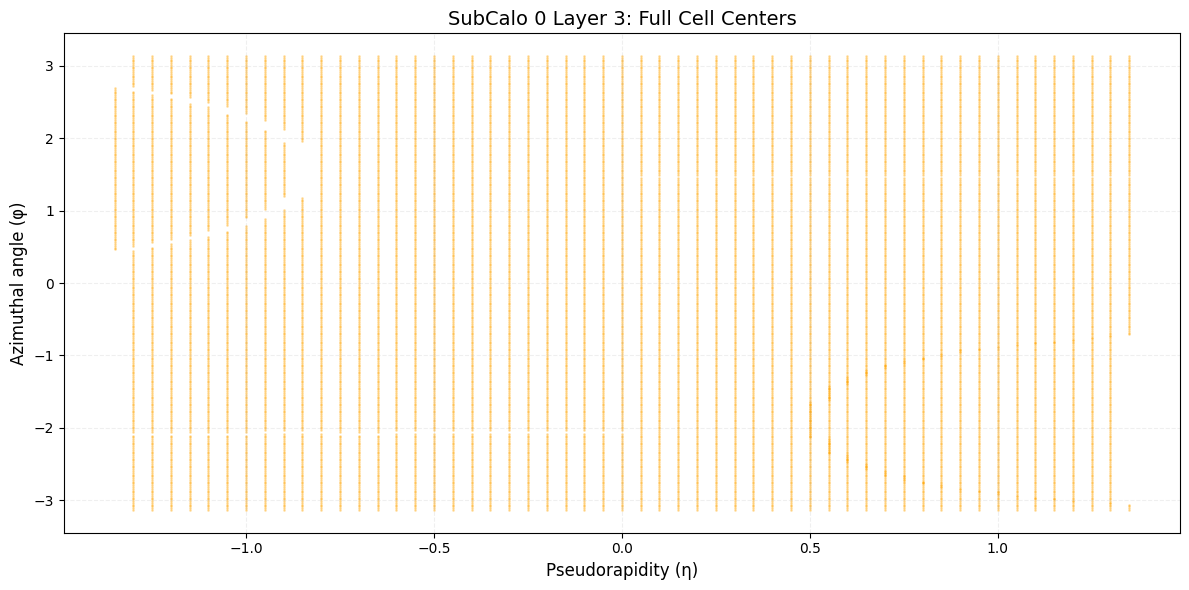

In [8]:
df_filtered, eta_rounded, phi_rounded = analyze_calo_layer_custom(df_cells, subcalo=0, layer=3, 
                                                                  eta_round_factor=0.05, 
                                                                  phi_round_factor=0.0245)